In [1]:
import awkward as ak
import numpy as np
import pickle
import hist
import coffea
from python.plugins import checkdir
%matplotlib inline

import matplotlib.pyplot as plt
import mplhep as hep
from mplhep.plot import soft_update_kwargs
plt.style.use([hep.style.CMS, hep.style.firamath])
hep.style.use("CMS")

In [9]:
#### Plot dijet systematics
from python.plotting import *
fname = "coffeaOutput/trijet/trijetHists_newUL18JECaddRho_JetHT_rap2.5_nominalMG_allUncALL.pkl"
fname = "coffeaOutput/dijet/dijetHists_newUL18JECaddRho_JetHT_rap2.5_allUncALL.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/trijet/trijetHists_newUL18JECaddRho_QCDsim_rap2.5_nominalMG_allUncALL.pkl"
fname = "coffeaOutput/dijet/dijetHists_newUL18JECaddRho_QCDsim_rap2.5_MG_nominal__allUncALL.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
print(result_mc["response_matrix_u"])
print(result_data["response_matrix_u"])
# fname = "coffeaOutput/trijet/trijetHists_JetHT_pt200.0_rapidity2.5_nominal2018.pkl"
# with open(fname, "rb") as f:
#     result_data = pickle.load( f )
# fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_allUnc2018.pkl"
# with open(fname, "rb") as f:
#     result_mc = pickle.load( f )
year = fname[-8:-4]
# fname = "coffeaOutput/trijetHists_JetHT_pt200-Copy1.0_rappidity2.5_NoneHEMveto2018.pkl"
# with open(fname, "rb") as f:
#     result_mc_older = pickle.load( f )
if "trijet" in fname:
    os_path = 'plots/syst/trijet/'
    channel = 'trijet'
else:
    channel='dijet'
    os_path = 'plots/syst/dijet/'
##### dijet edges
if channel != "trijet":
    edges = [   0., 20., 40., 50.,  60., 70., 80., 90., 100.,  125.,  150., 
             175., 200.,  250.,300.,  800., 1300.]
    edges_gen = [   0., 40.,  60., 80., 100.,  150.,  200.,300., 1300.]

#### trijet edges
else:
    edges = [  0.,20.,   40.,   50.,   60.,
         70.,   80.,   90.,  100., 120.,140.,
        160.,  230.,  300.,  800., 1300.]
    edges_gen = [0., 40, 60, 80, 100, 120, 160, 300, 1300]
    
#### dijet pt edges
if channel != "trijet":
    pt_edges = [200, 290, 480, 570, 680, 13000]
#### trijet pt edges
else:
    pt_edges = [200, 290, 400, 680, 13000]
# pt_edges = [200, 290, 400, 480, 570, 680, 760, 13000]
respHists = ['response_matrix_u', 'response_matrix_g', 'ptreco_mreco_u', 'ptreco_mreco_g', 'ptgen_mgen_u', 'ptgen_mgen_g','fakes', 'misses', 'fakes_g', 'misses_g']
def rebinAllHists(results, hists, newbins, axis = 'ptreco'):
    for result in results:
        for histo in [h for h in result if h in hists]:
            axis_names = [ax.name for ax in result[histo].axes]
            if axis in axis_names:
                result[histo] = rebin_hist(result[histo], axis, newbins)
    return results
rebinAllHists([result_mc, result_data], respHists, pt_edges, axis = 'ptreco')
rebinAllHists([result_mc, result_data], respHists, pt_edges, axis = 'ptgen')

Hist(
  StrCategory(['pythiaMG2016APV', 'pythiaMG2016', 'pythiaMG2017', 'pythiaMG2018'], growth=True, name='dataset', label='Primary dataset'),
  StrCategory(['HEM', 'jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown', 'nominal', 'PUSFUp', 'LuminosityDown', 'PDFDown', 'PDFUp', 'L1prefiringDown', 'Q2Up', 'PUSFDown', 'LuminosityUp', 'L1prefiringUp', 'Q2Down', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'Relativ

[{'misses': Hist(
    StrCategory(['pythiaMG2016APV', 'pythiaMG2016', 'pythiaMG2017', 'pythiaMG2018'], growth=True, name='dataset', label='Primary dataset'),
    StrCategory(['HEM', 'jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown', 'nominal', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'Relat

In [10]:
#### Check available uncertainties
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(20,)
new ticks  [0.0, 200.0, 400.0, 600.0, '$\\infty$']


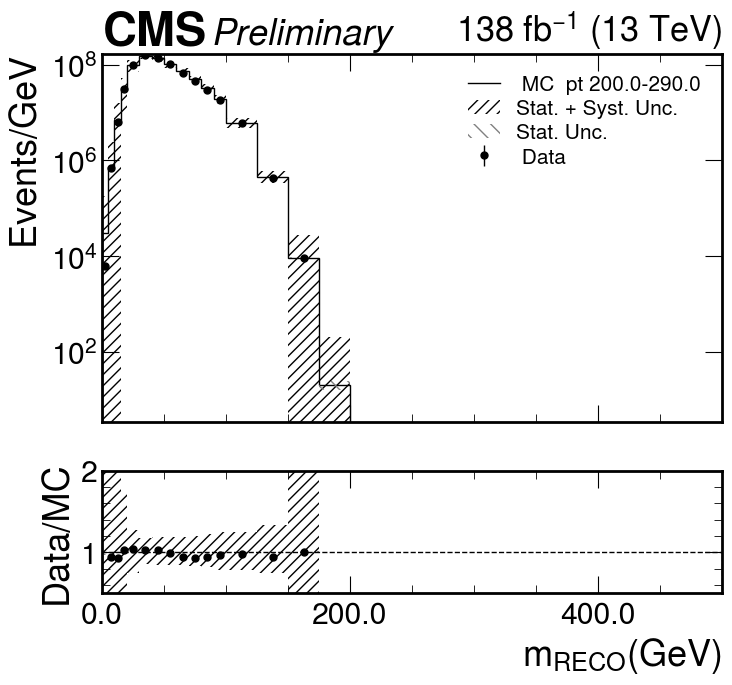

new ticks  [0.0, 200.0, 400.0, 600.0, '$\\infty$']


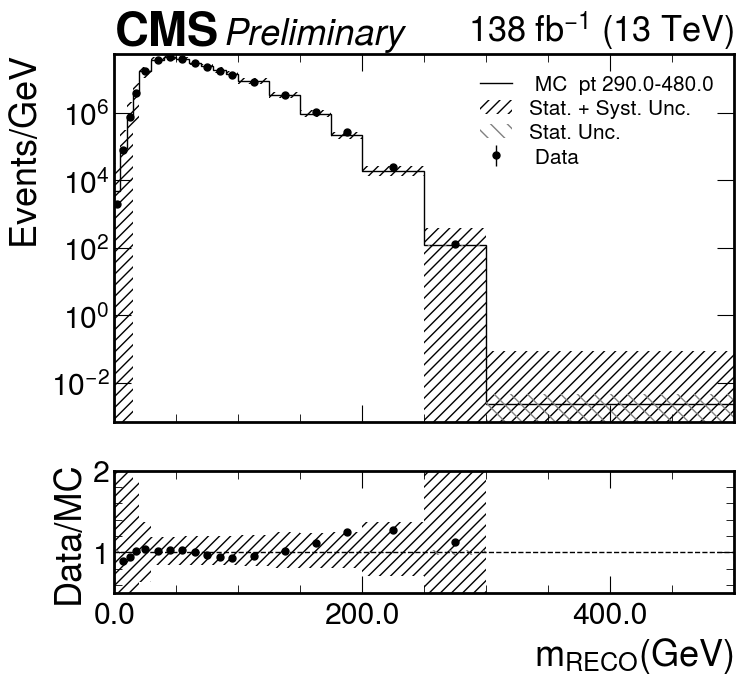

new ticks  [0.0, 200.0, 400.0, 600.0, '$\\infty$']


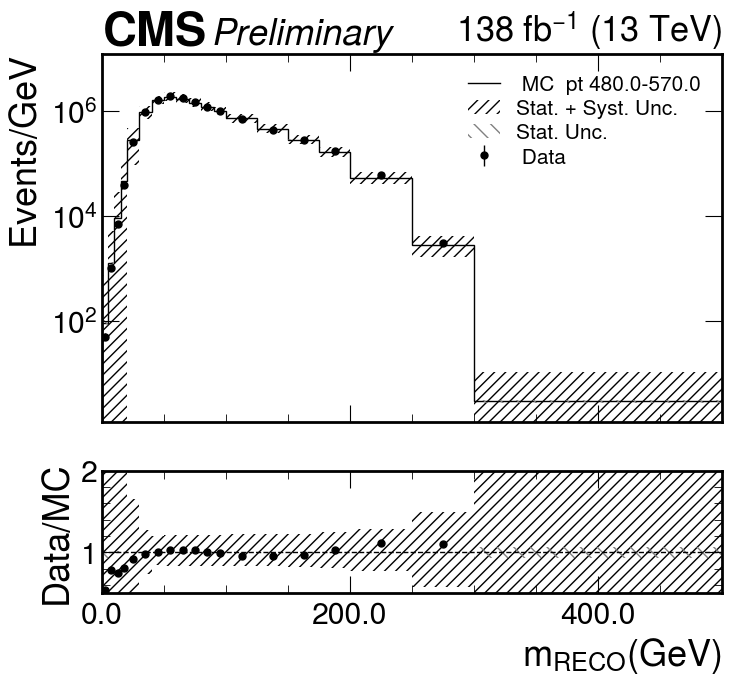

new ticks  [0.0, 200.0, 400.0, 600.0, '$\\infty$']


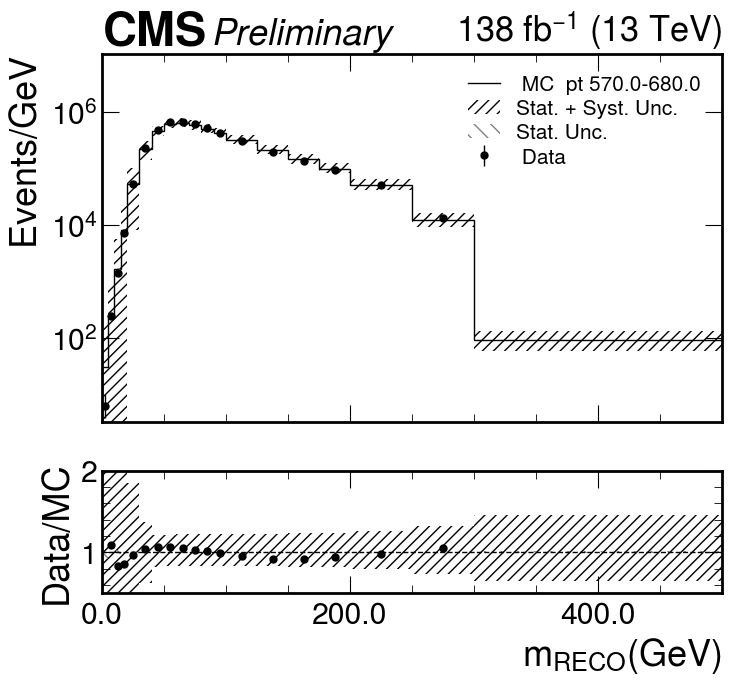

new ticks  [0.0, 200.0, 400.0, 600.0, '$\\infty$']


In [11]:
from python.plotting import *
groomed = False
if groomed:
    groom_str = "_g"
else:
    groom_str = "_u"
print(getTotSyst(result_mc, "response_matrix"+groom_str)[0].shape)
hist_mc = "response_matrix"+groom_str
hist_data = "ptreco_mreco"+groom_str
plotDataMCwErrorsBinned(result_mc, result_data, hist_mc, hist_data, "ULRun2", channel = "", axVar="mreco", norm = True, rax_lim=None, os_path='plots/syst/', binwnorm=True, trim = 500., yoffset=1E7)


In [12]:
def plotFractionalUnc(result, histname, axVar = "mreco", binVar = "ptreco", sys_list = None, binned=True):
    jes_syst_list = ['AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'RelativeStatECUp', 'RelativeStatECDown', 'RelativeStatFSRUp', 'RelativeStatFSRDown', 'RelativeStatHFUp', 'RelativeStatHFDown', 'SinglePionECALUp', 'SinglePionECALDown', 'SinglePionHCALUp', 'SinglePionHCALDown', 'TimePtEtaUp', 'TimePtEtaDown']
    jes_syst_list_up = [jes for jes in jes_syst_list if 'Up' in jes]
    non_jes_sys_list = ['HEM', 'PDFDown', 'PDFUp', 'L1prefiringDown', 'L1prefiringUp', 'Q2Up', 'PUSFUp', 'Q2Down', 'PUSFDown','jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown']
    non_jes_sys_list_up =  [jes for jes in non_jes_sys_list if 'Up' in jes]
    availSysts = [ax for ax in result[histname].project("syst").axes[0]]
    totsys, totsysdn = getTotSyst(result, histname, binned=binned)
    total_sys_jes = np.zeros(result[histname].project(binVar, axVar).values().shape)
    nom_vals = result[histname][{'syst':'nominal'}].project(binVar, axVar).values()
    for sys in (syst for syst in availSysts if syst in jes_syst_list_up):
        for i in range(len(nom_vals)):
            total_sys_jes[i] += (result[histname][{'syst':sys}].project(binVar, axVar).values()[i]-result[histname][{'syst':'nominal'}].project(binVar, axVar).values()[i])**2
    total_sys_jes = total_sys_jes**0.5
    total_sys_jes = total_sys_jes
    binedges = [bin[0] for bin in result[histname].project(binVar).axes[0]] + [result[histname].project(binVar).axes[0][-1][1]]
    axedges = [bin[0] for bin in result[histname].project(axVar).axes[0]] + [result[histname].project(axVar).axes[0][-1][1]]
    if sys_list is None:
        for i in range(len(binedges)-1):
            for sys in (syst for syst in availSysts if syst in non_jes_sys_list_up):
                delta_sys_vals = result[histname][{'syst':sys}].project(binVar, axVar).values() - np.abs(nom_vals[i])
                plt.stairs(np.abs(delta_sys_vals[i])/np.abs(nom_vals[i]), axedges , label = sys )

            plt.stairs(total_sys_jes[i]/np.abs(nom_vals[i]), axedges , label = "JESUp" )
            plt.stairs(totsys[i]/np.abs(nom_vals[i]), axedges , label = "Total" )
            plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
            plt.xlim(0,500)
            plt.ylim(1E-4,10)
            plt.text(400., 0.9, "pT "+str(binedges[i])+"-"+str(binedges[i+1]),
                        fontsize=16,
                       )
            plt.yscale('log')
            # plt.xscale('log')
            plt.show()
    else:
        return_obj = []
        for i in range(len(binedges)-1):
            for sys in sys_list:
                if sys == "total":
                    return_obj.append([totsys[i]/np.abs(nom_vals[i]), axedges] )
                elif sys == "JESUp" or sys == "JESDown":
                    return_obj.append([total_sys_jes[i]/np.abs(nom_vals[i]), axedges] )
                else:
                    delta_sys_vals = result[histname][{'syst':sys}].project(binVar, axVar).values() - np.abs(nom_vals[i])
                    return_obj.append([delta_sys_vals[i]/np.abs(nom_vals[i]), axedges] )
                
        return return_obj

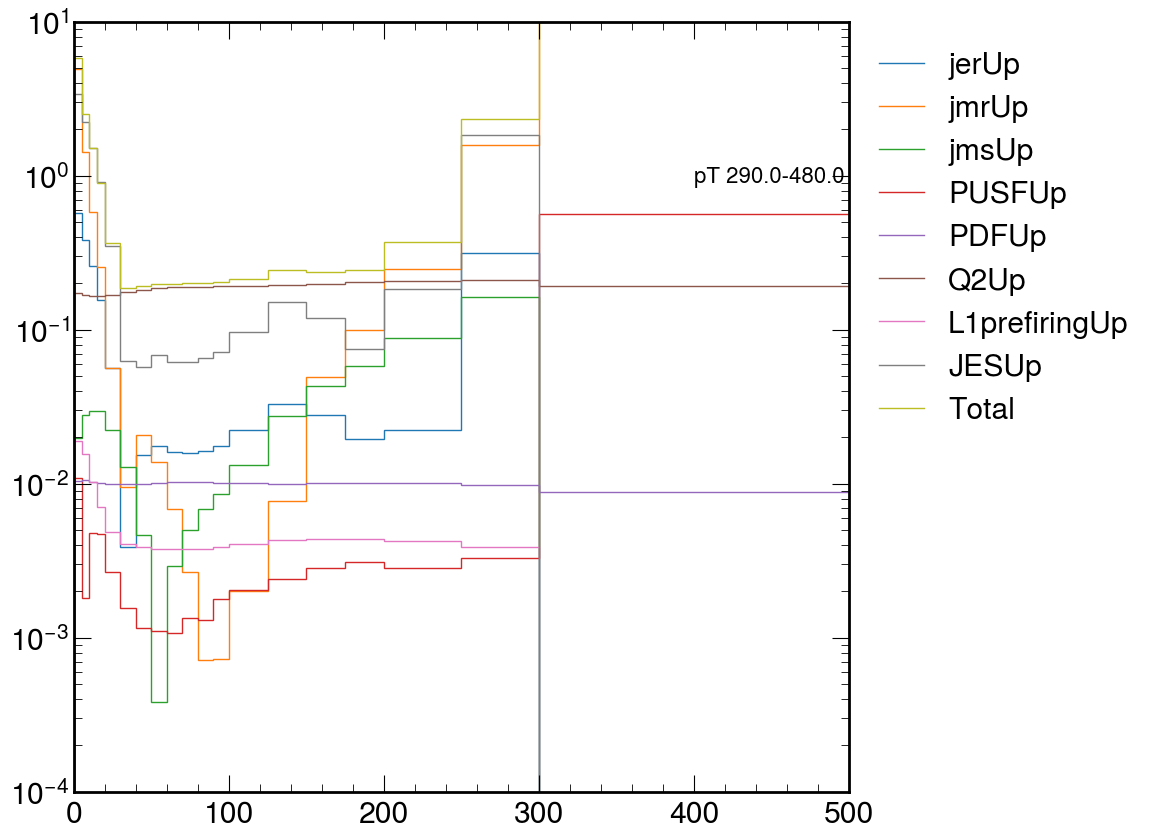

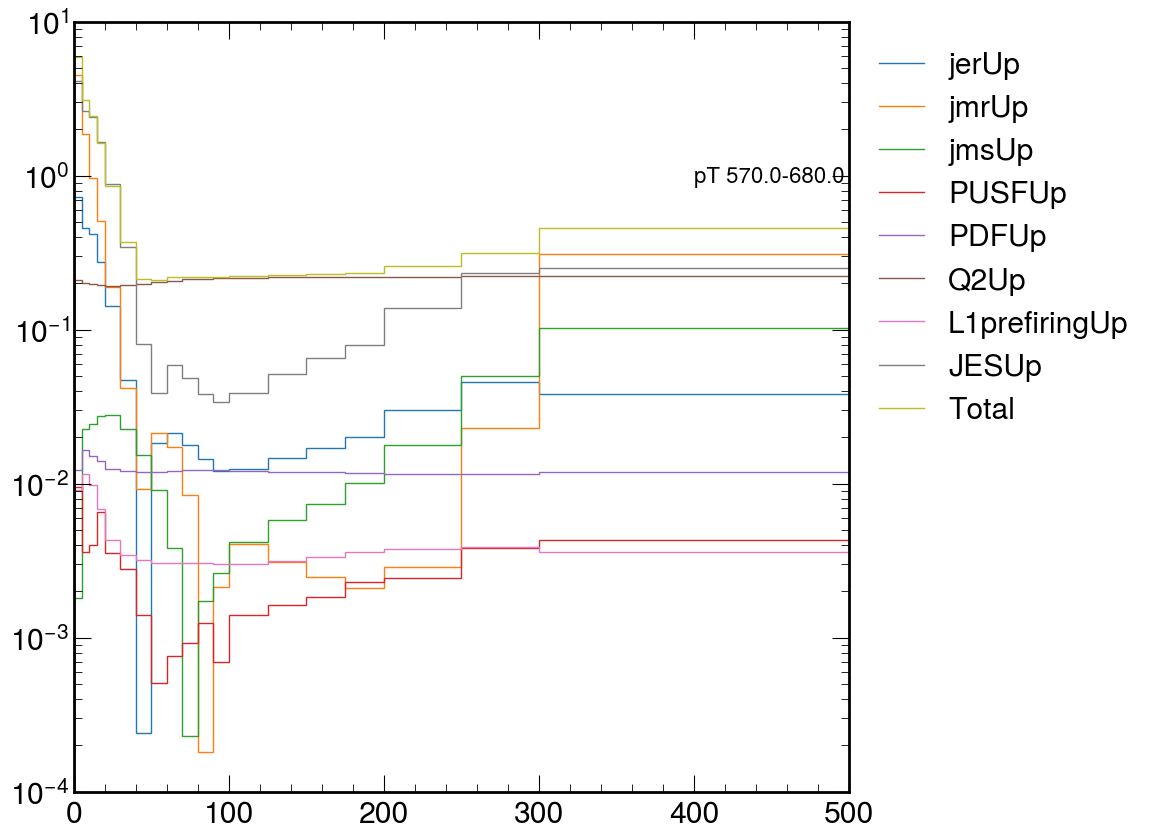

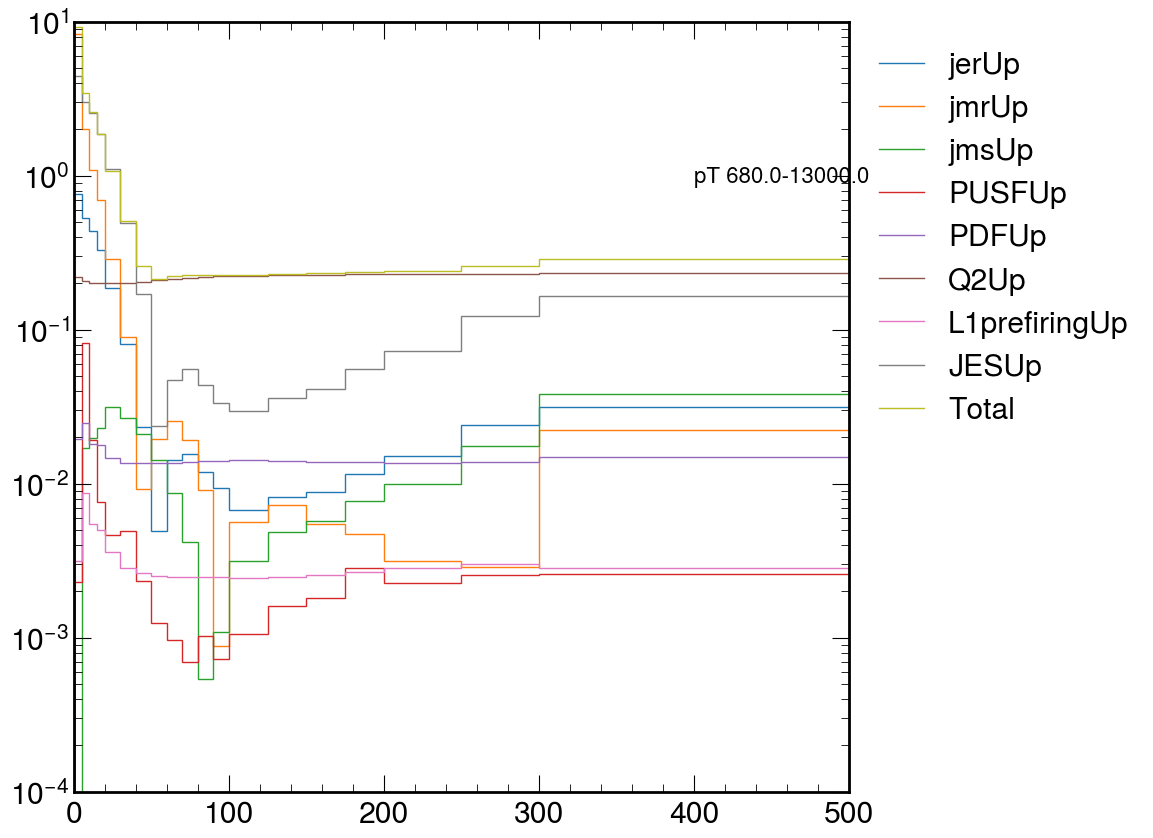

In [13]:
plotFractionalUnc(result_mc, "response_matrix_u")

['HEM', 'jerUp', 'jerDown', 'jmrUp', 'jmrDown', 'jmsUp', 'jmsDown', 'nominal', 'PUSFUp', 'LuminosityDown', 'PDFDown', 'PDFUp', 'L1prefiringDown', 'Q2Up', 'PUSFDown', 'LuminosityUp', 'L1prefiringUp', 'Q2Down', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSa

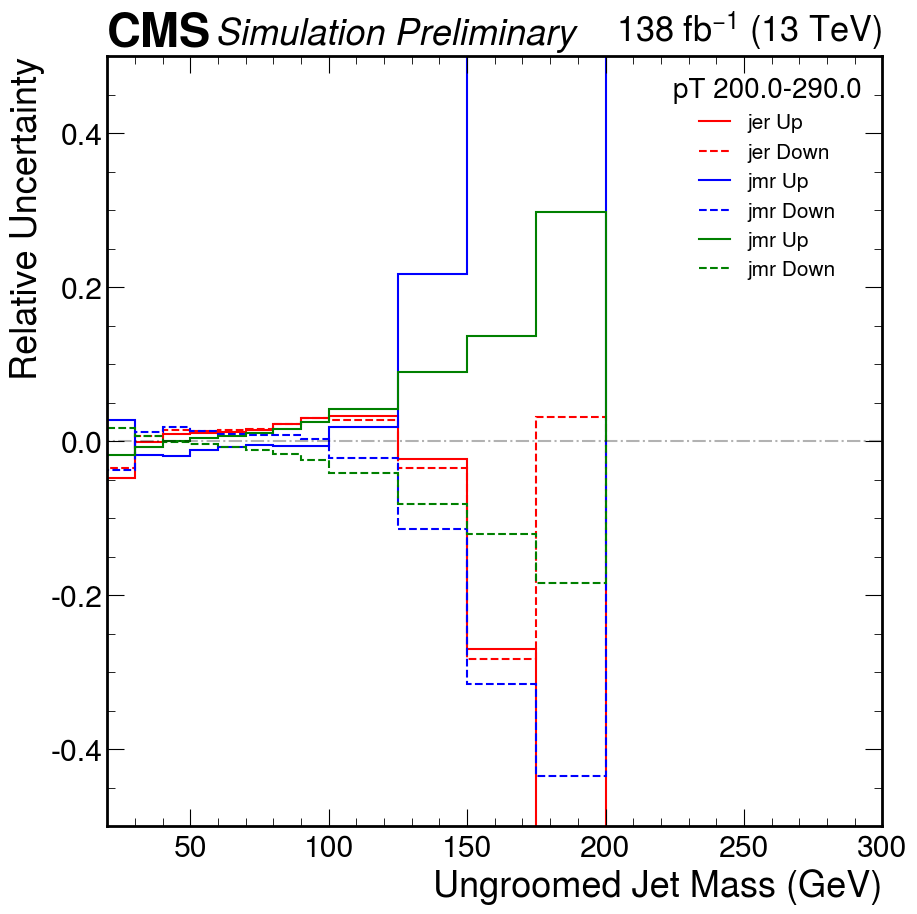

doing  AbsoluteMPFBias AbsoluteScale


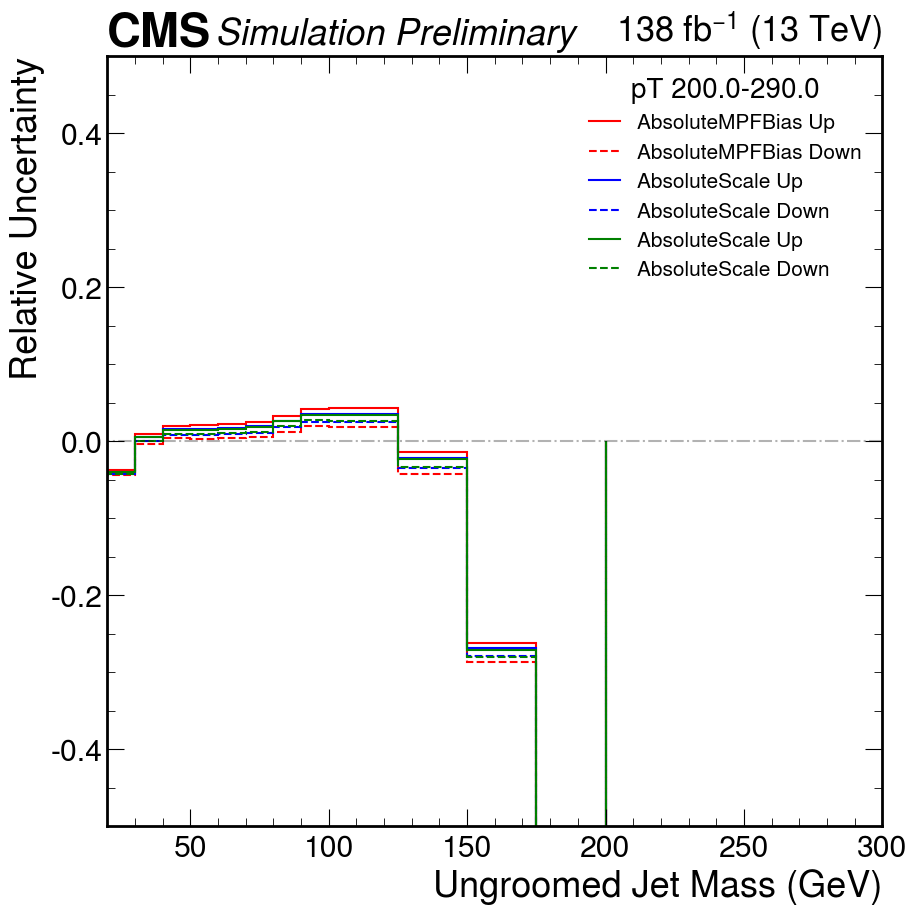

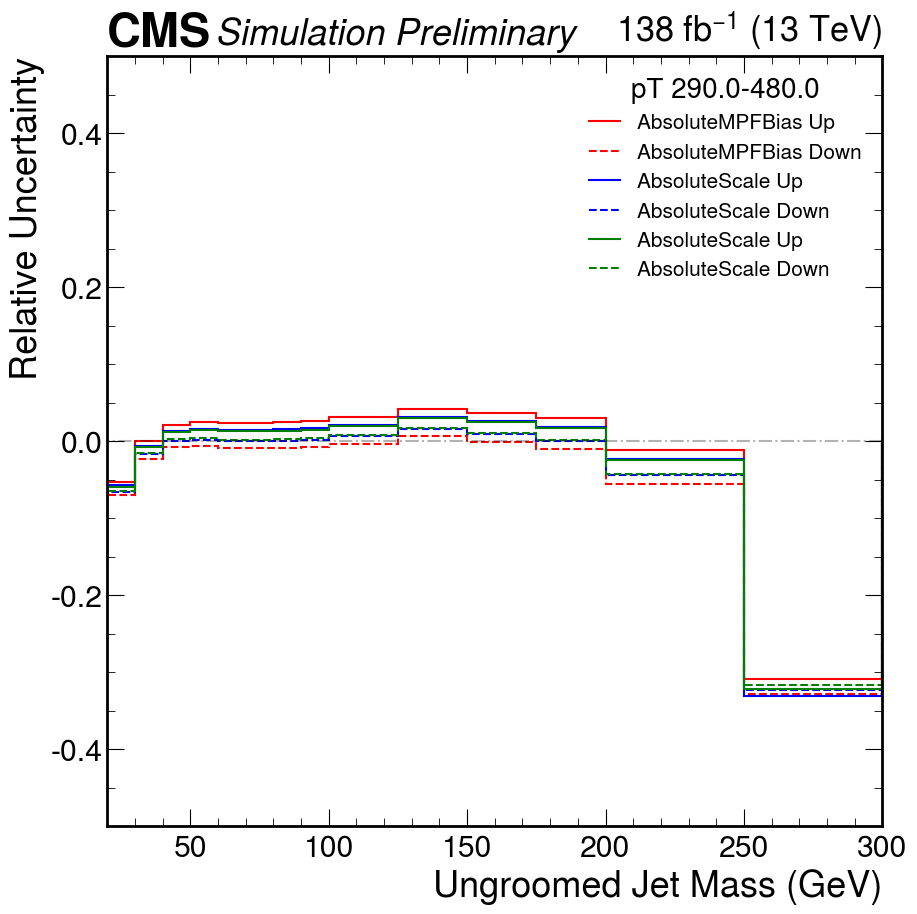

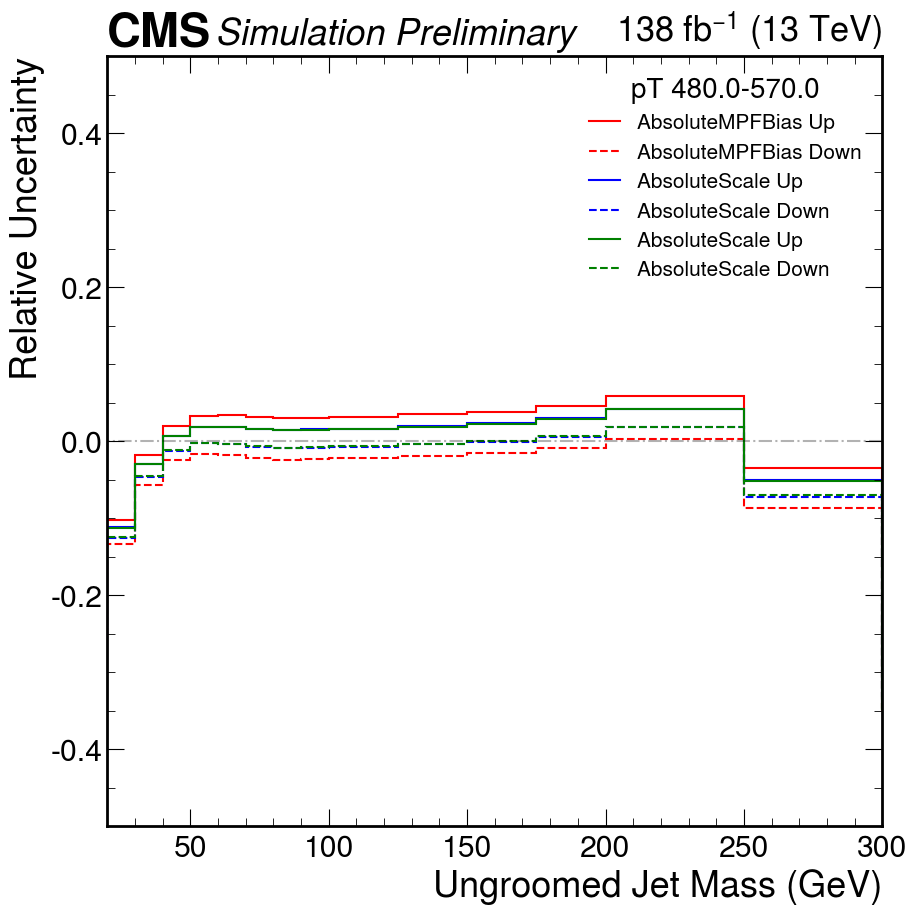

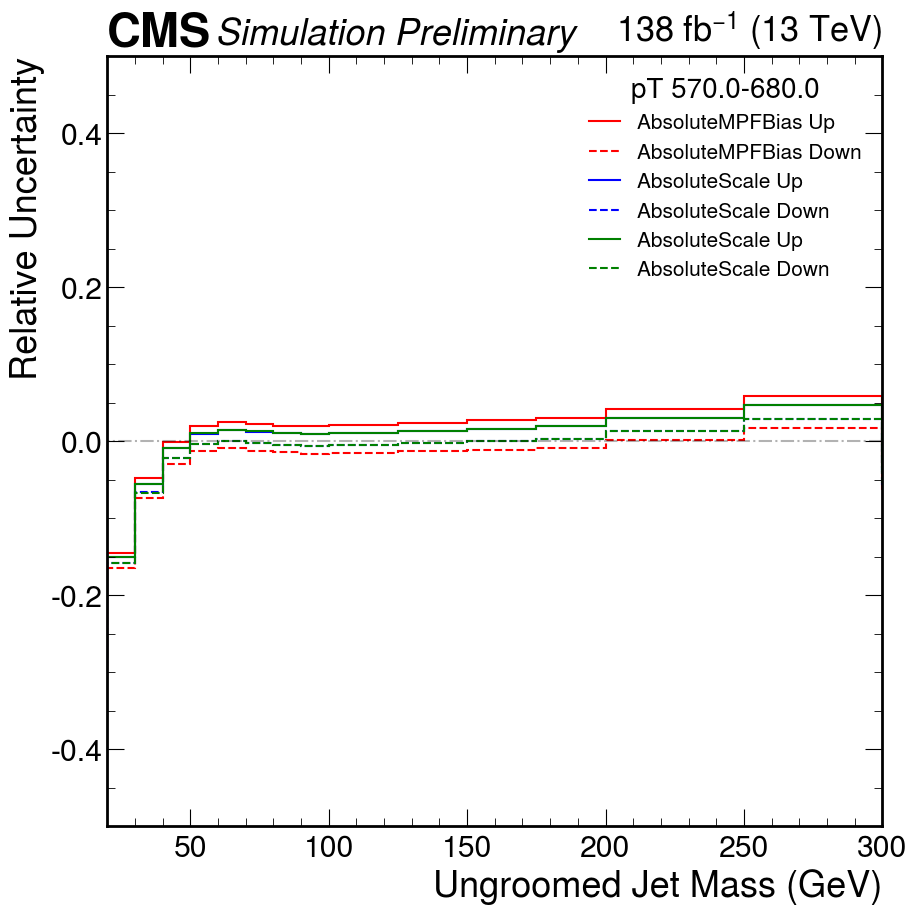

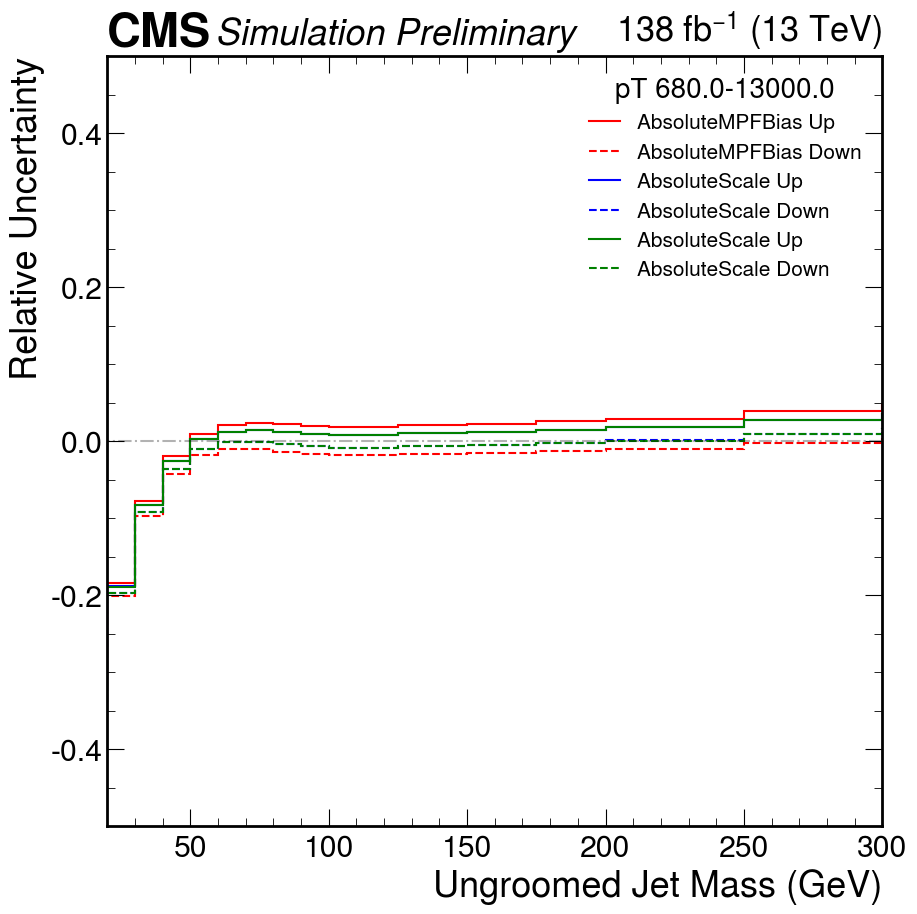

doing  FlavorQCD Fragmentation


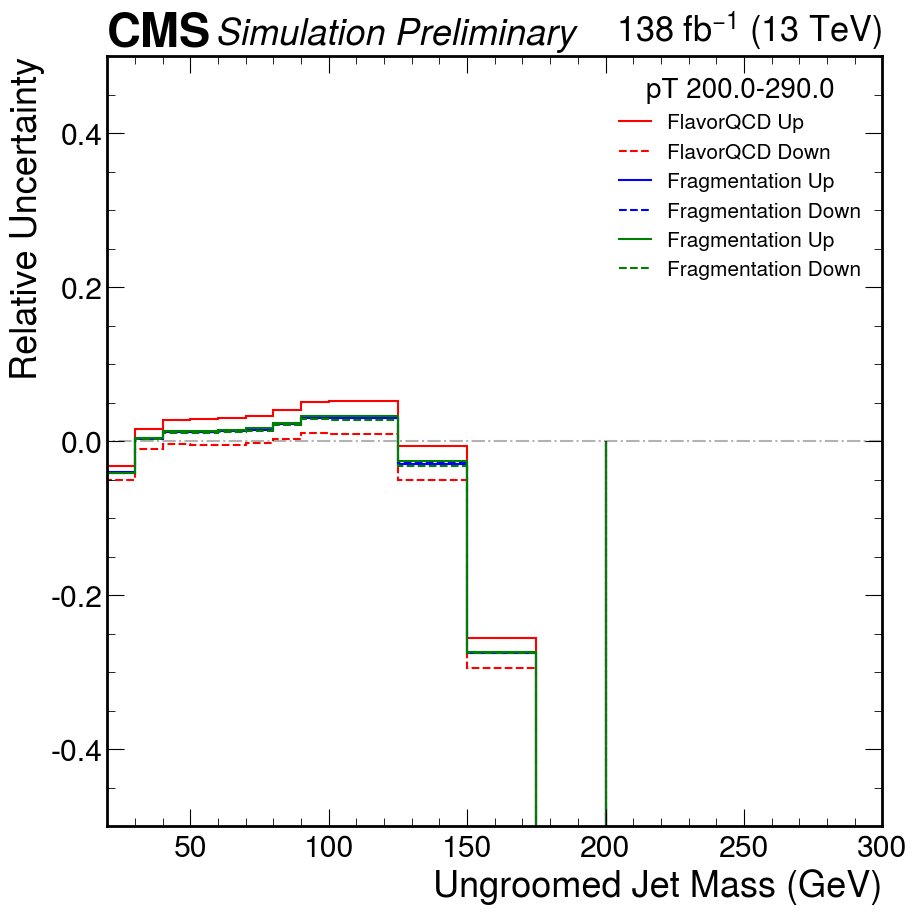

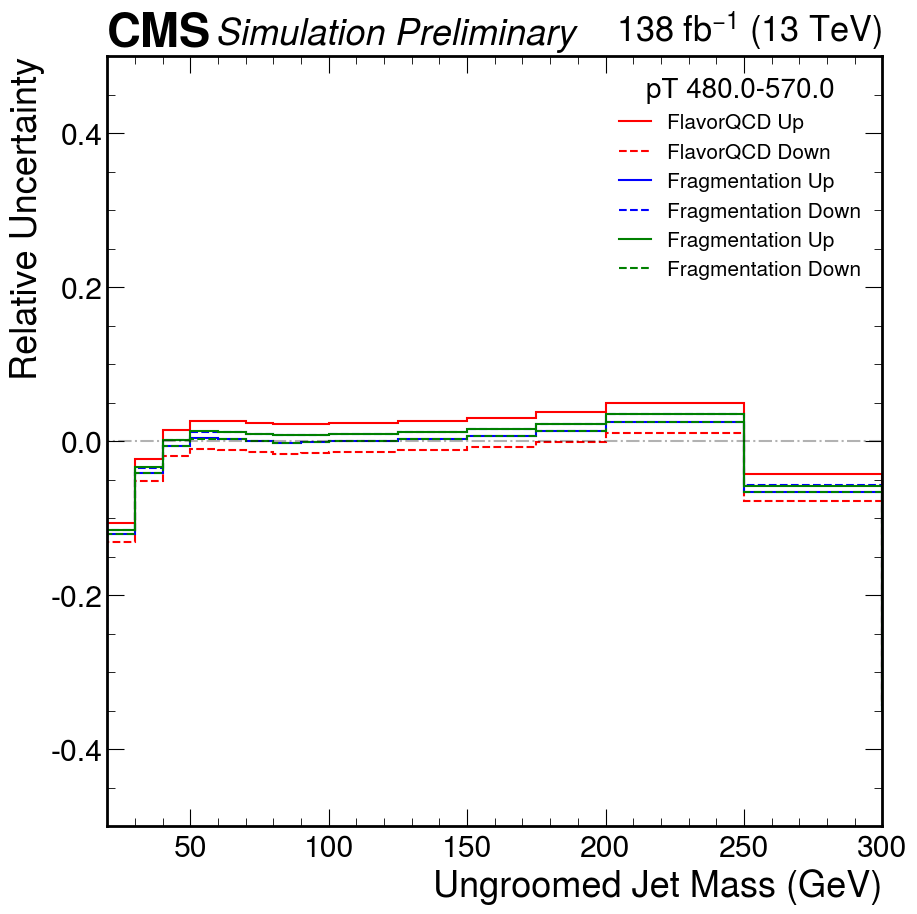

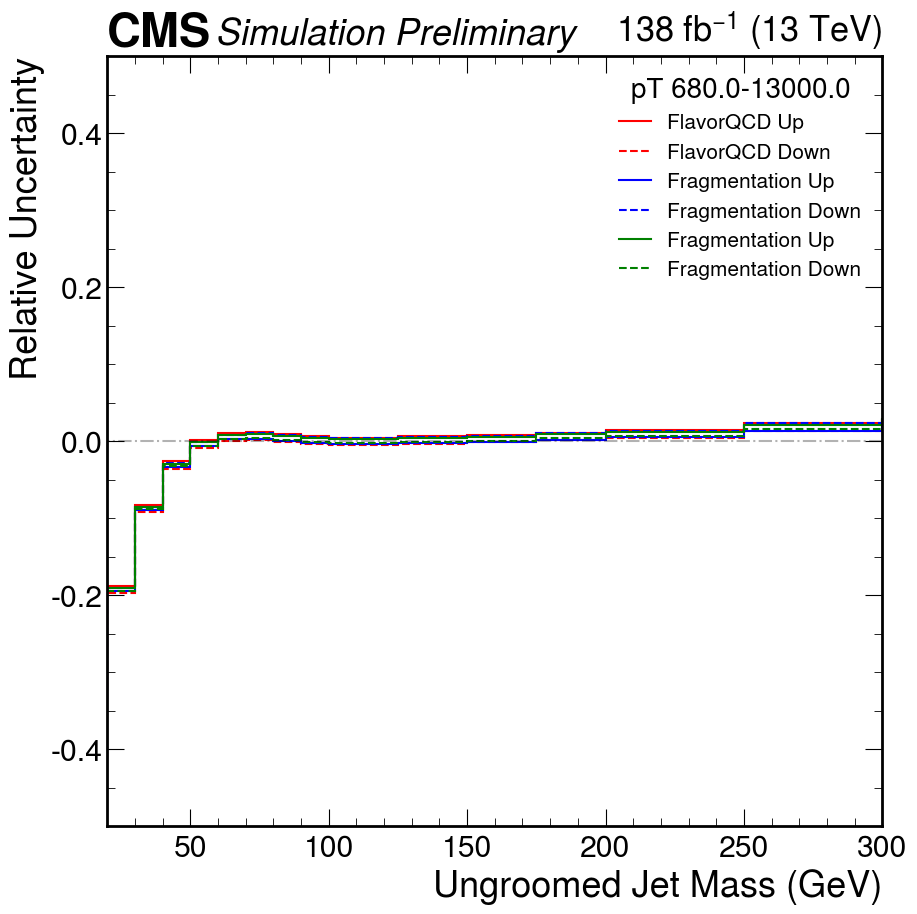

doing  PileUpPtBB PileUpPtEC1


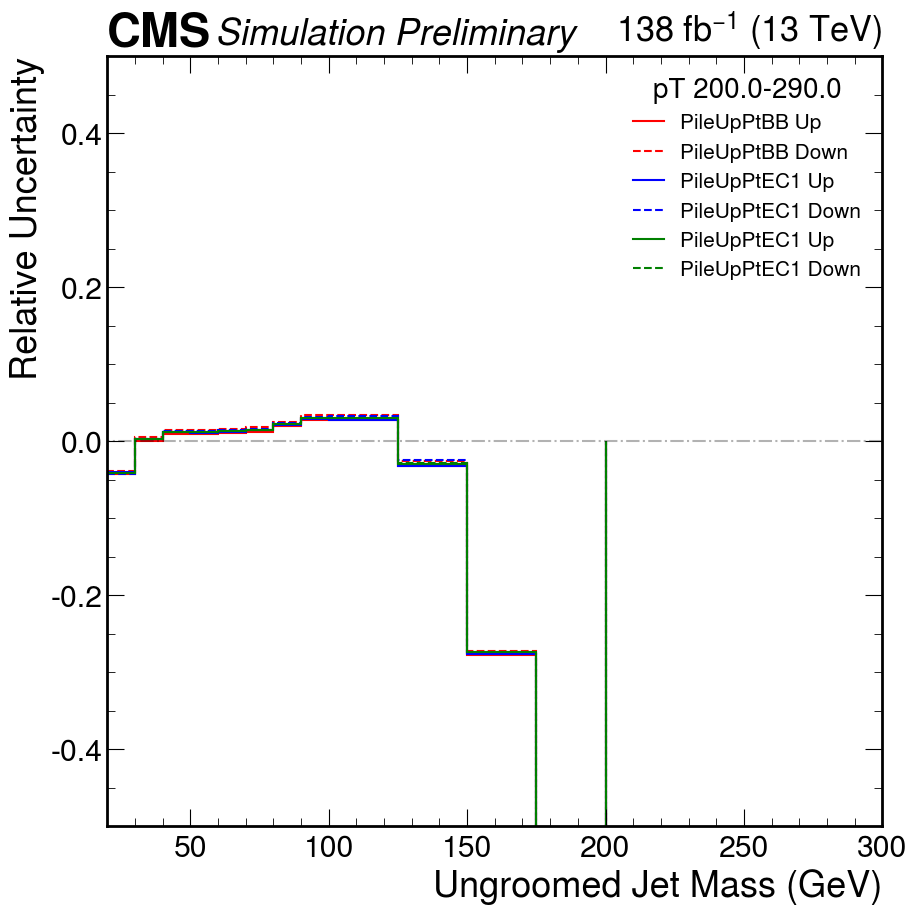

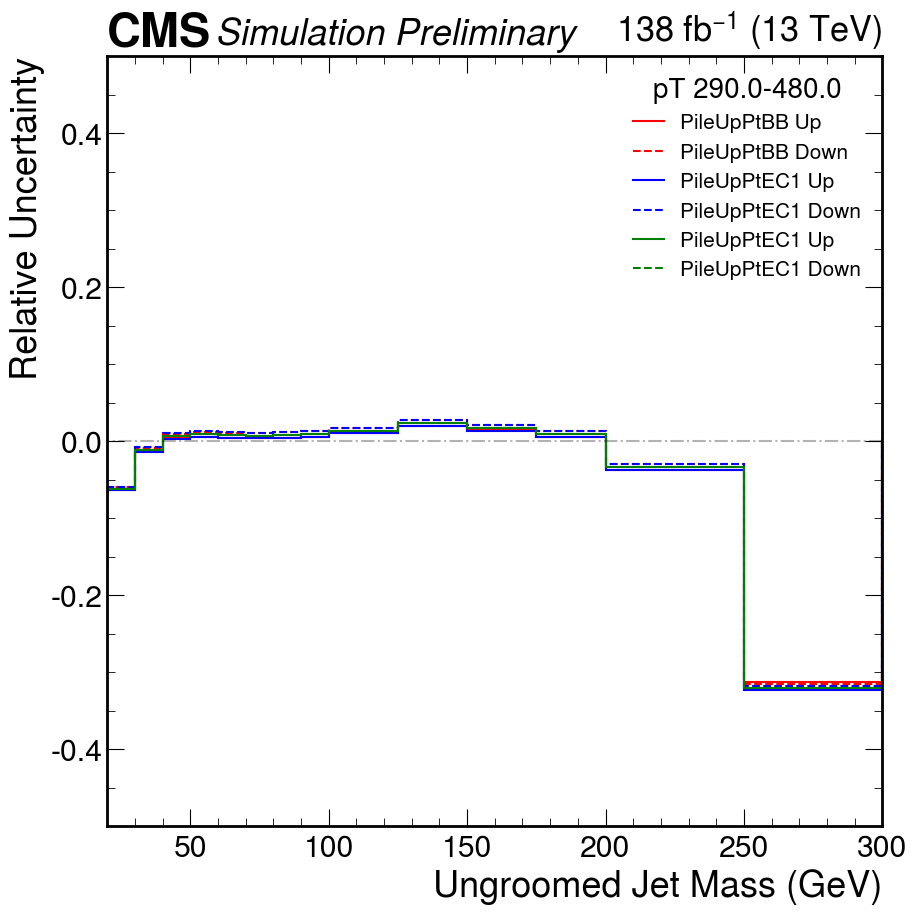

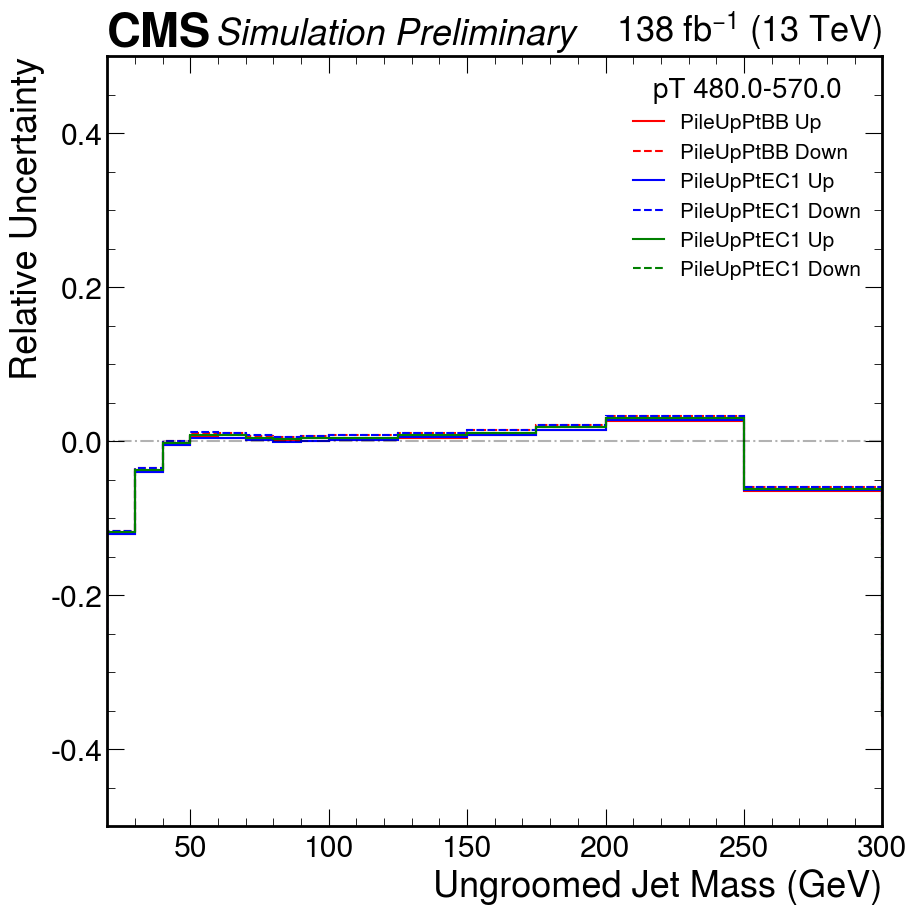

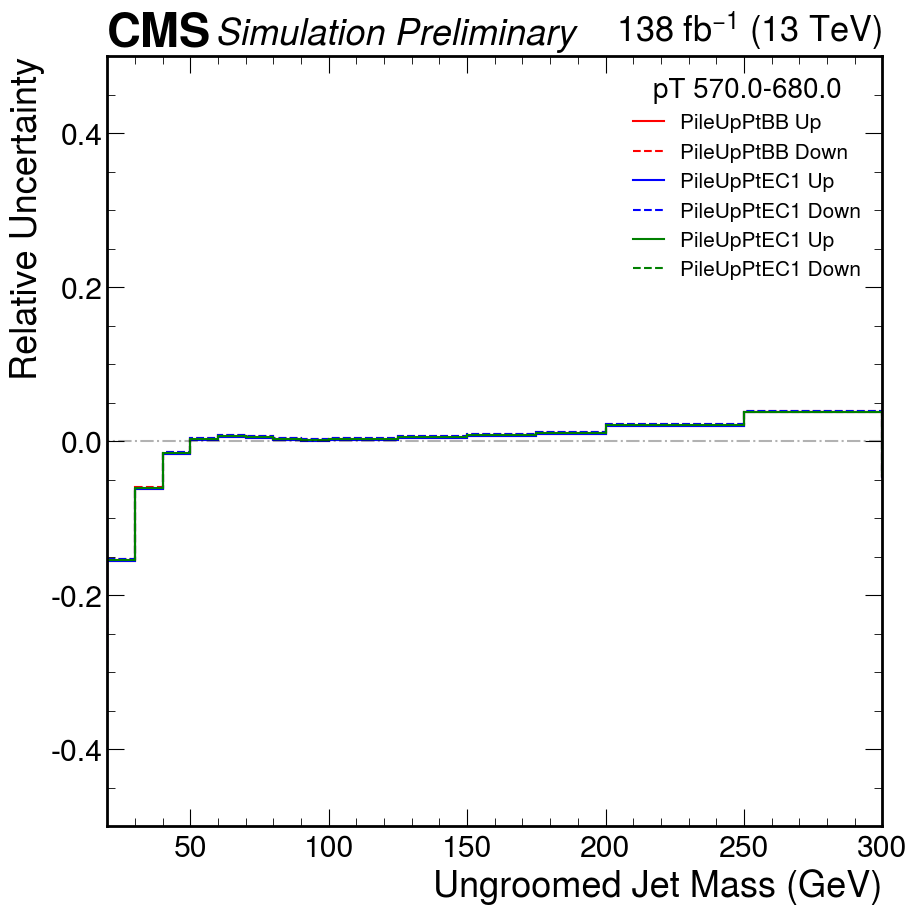

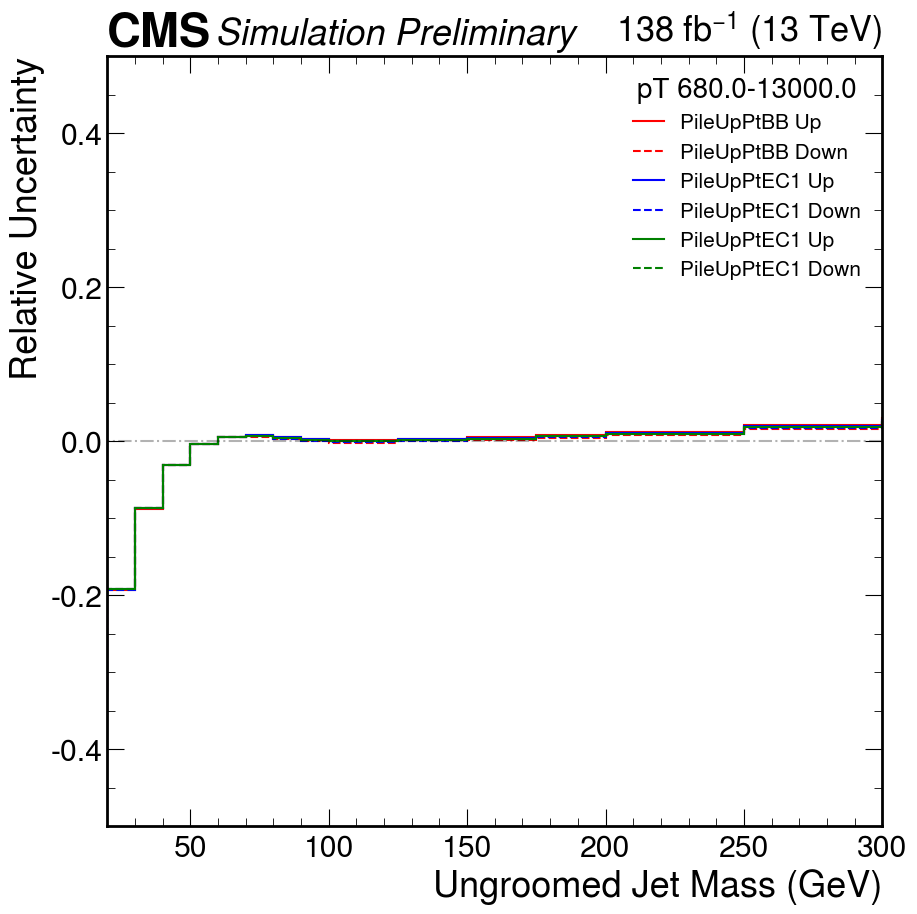

doing  PileUpPtHF PileUpPtRef


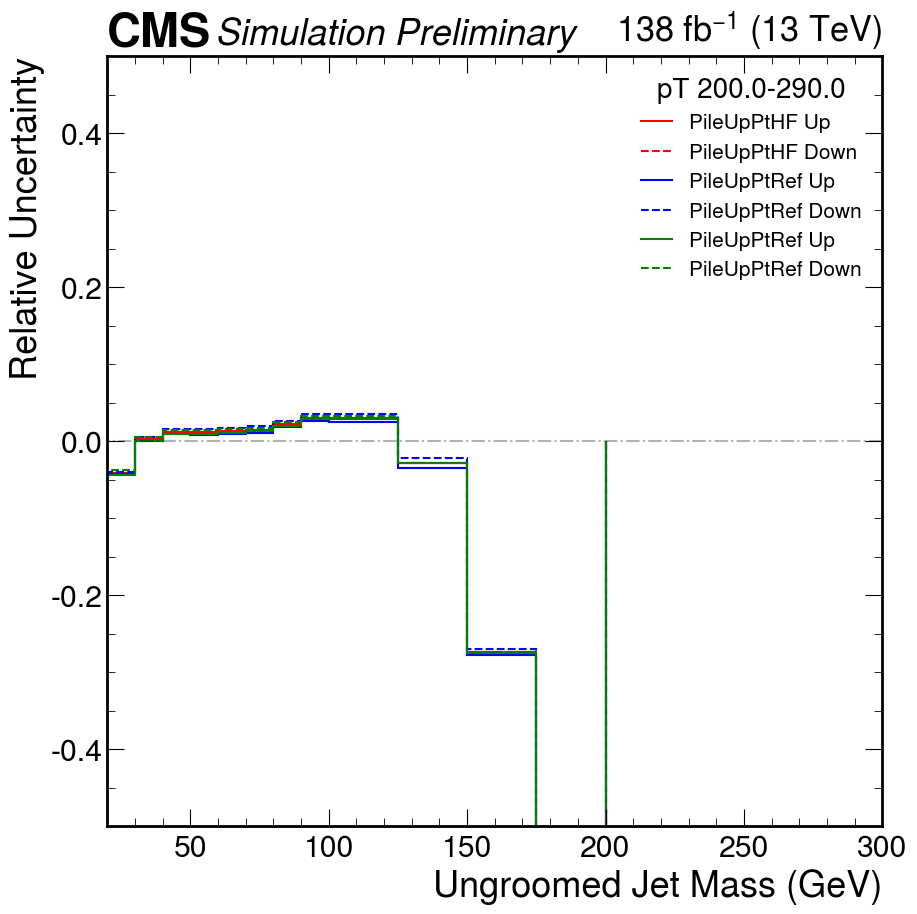

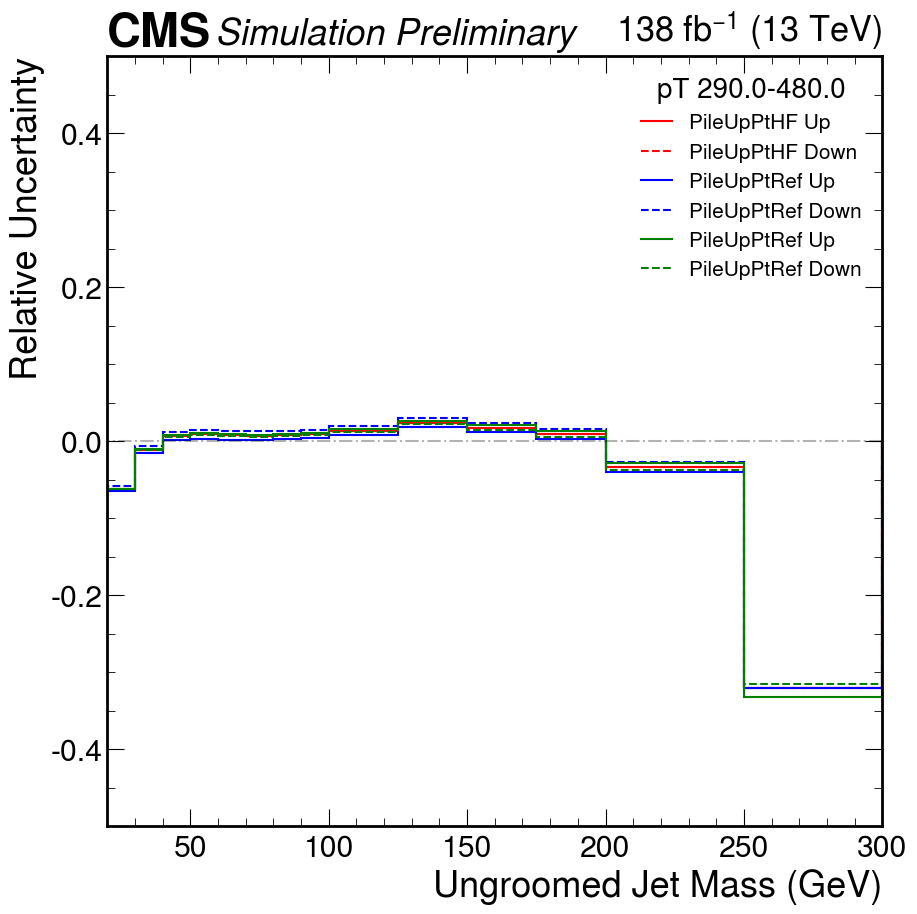

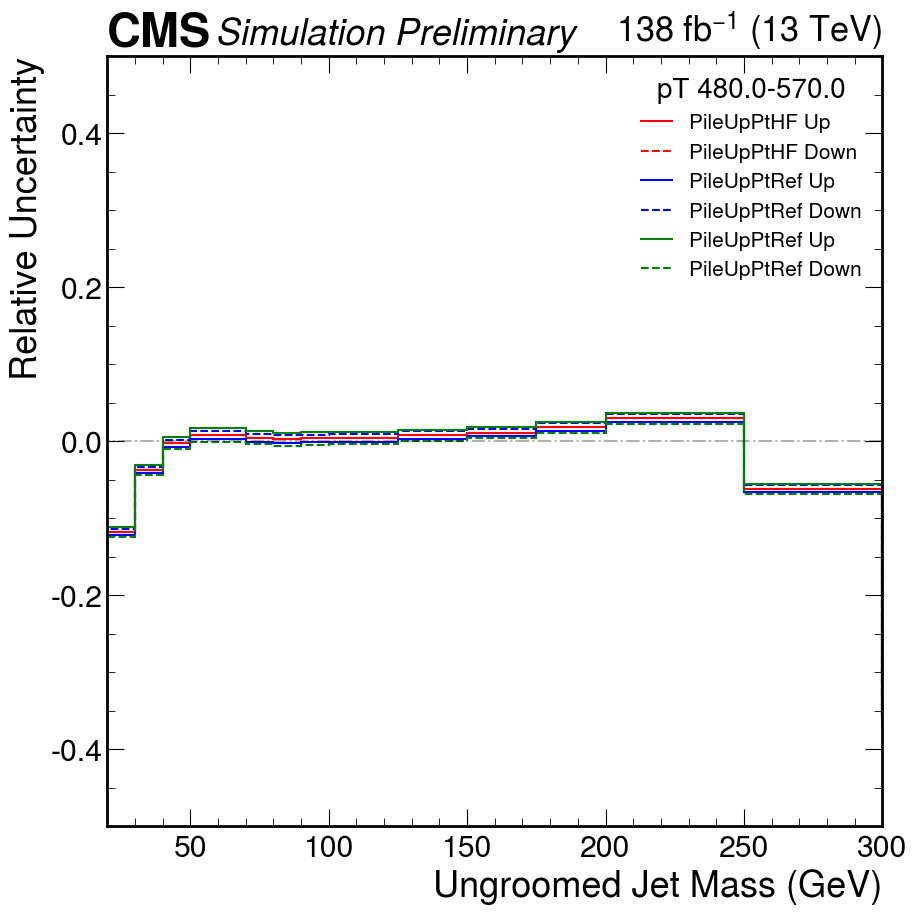

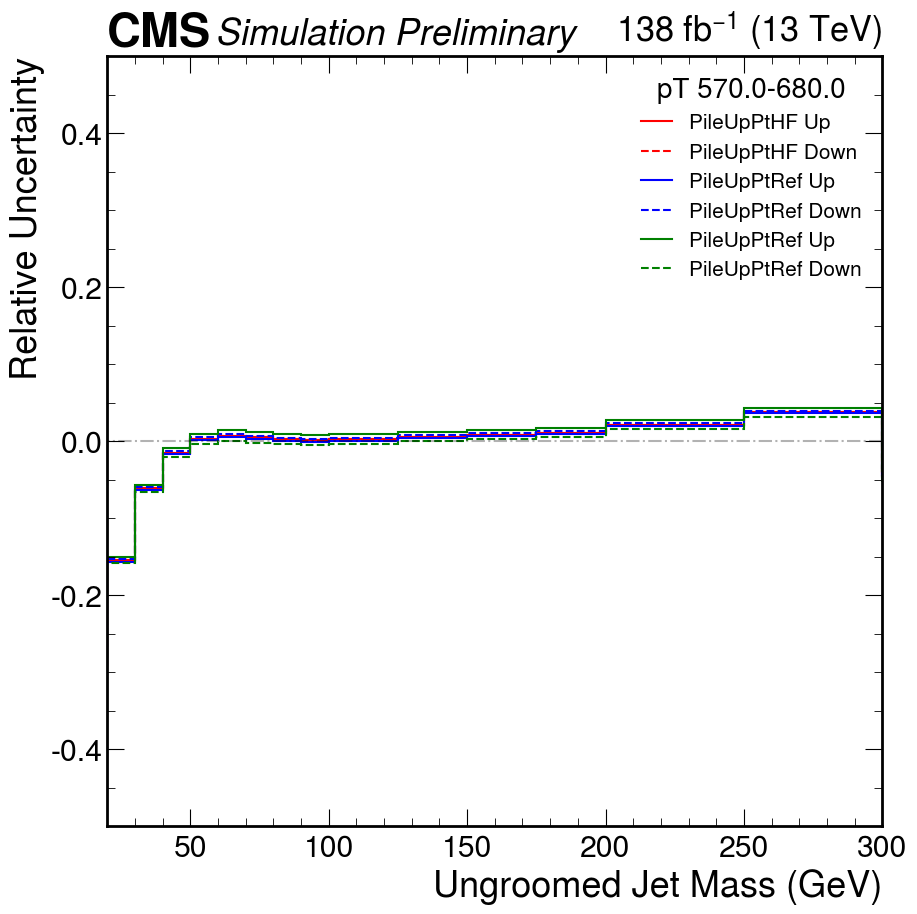

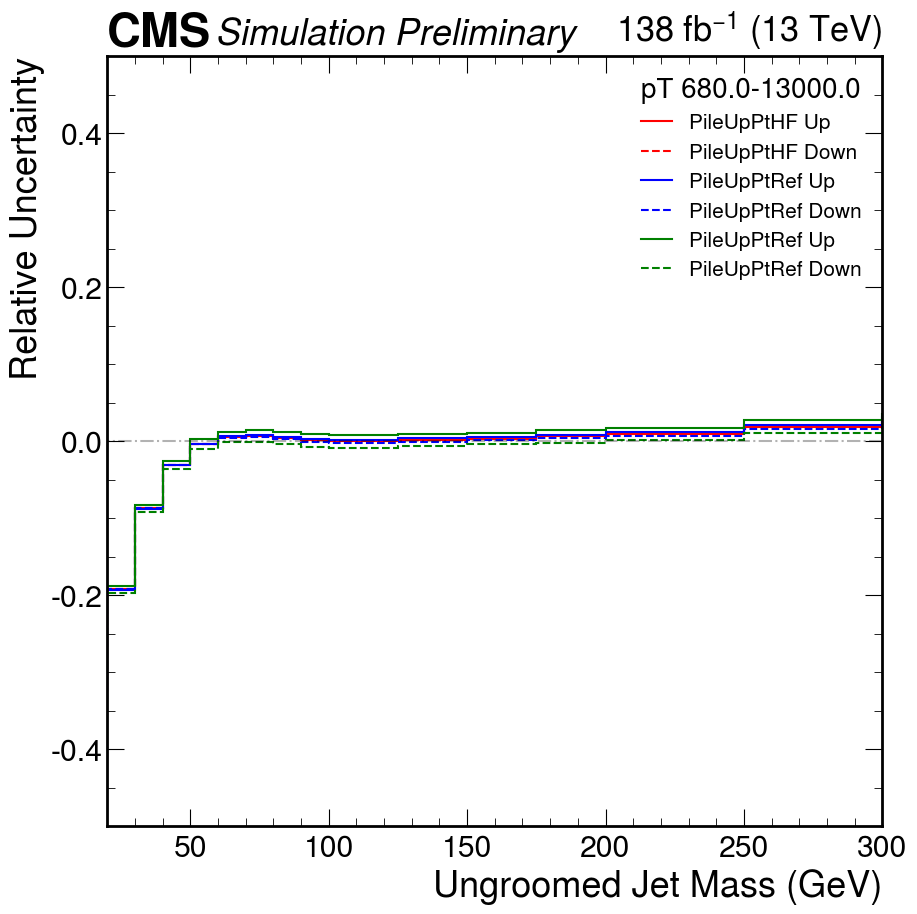

doing  RelativeJEREC1 RelativeJEREC2


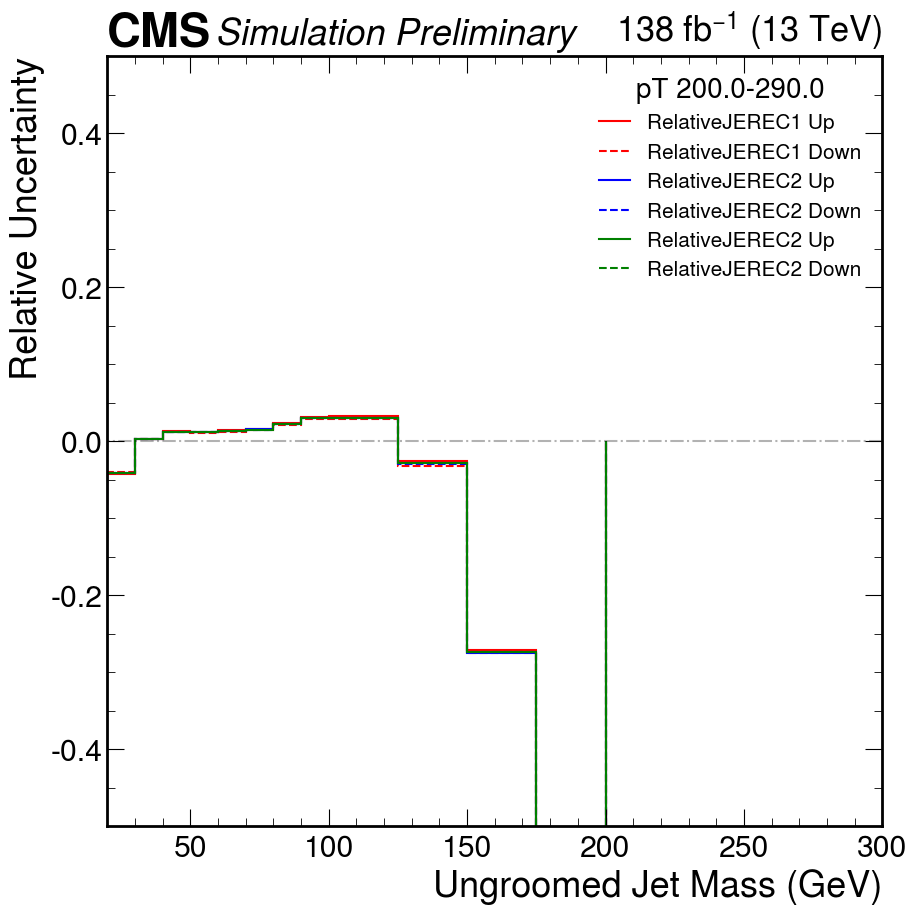

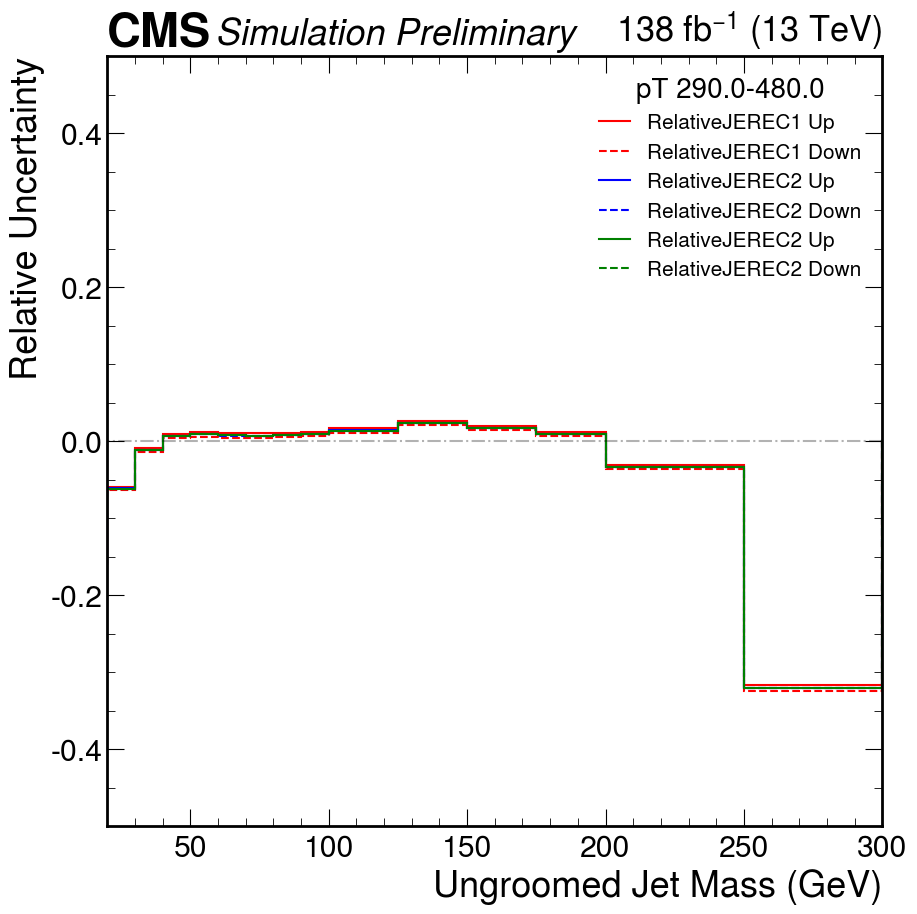

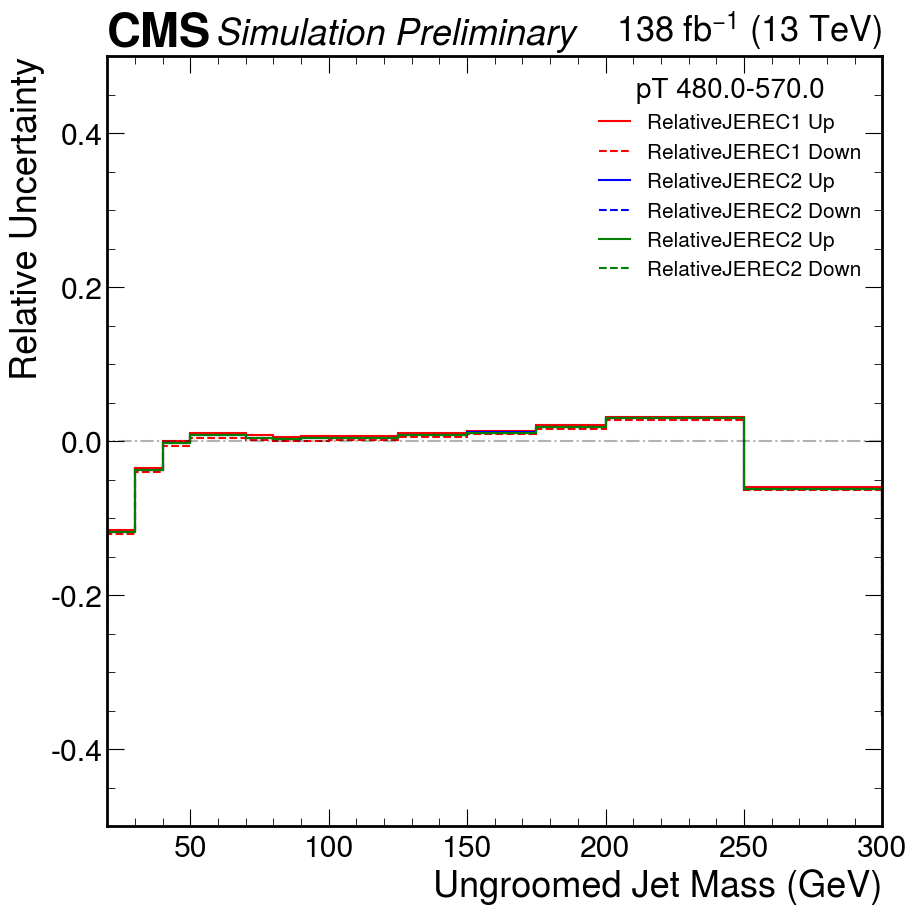

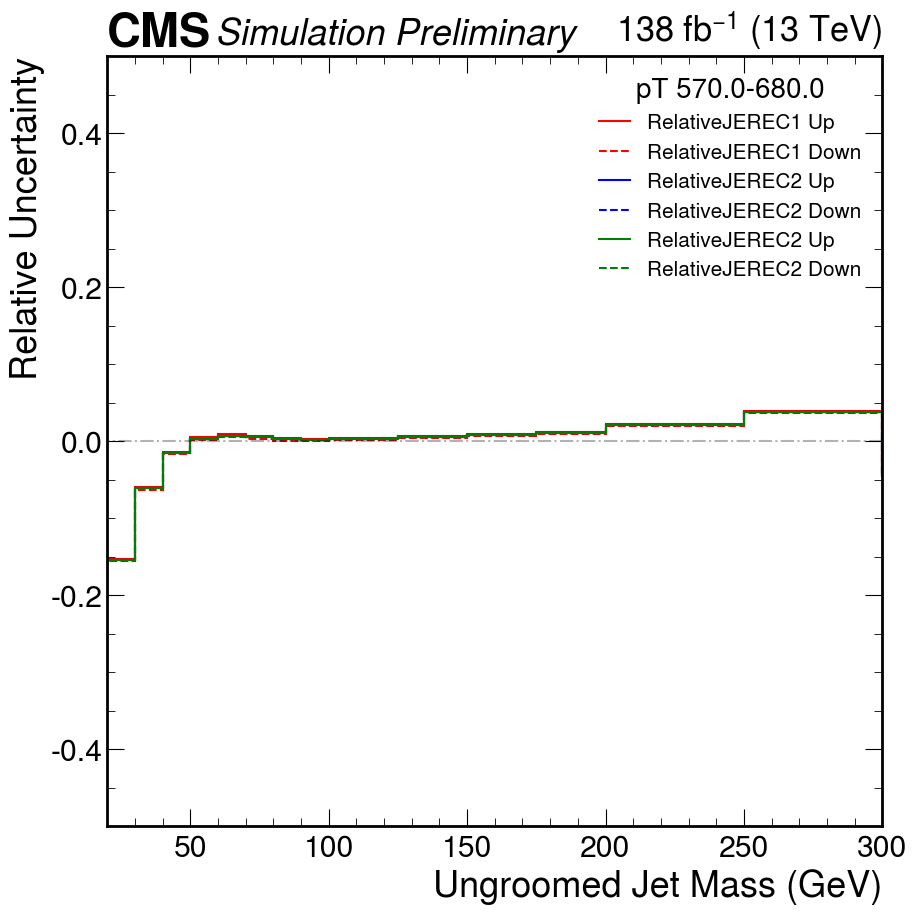

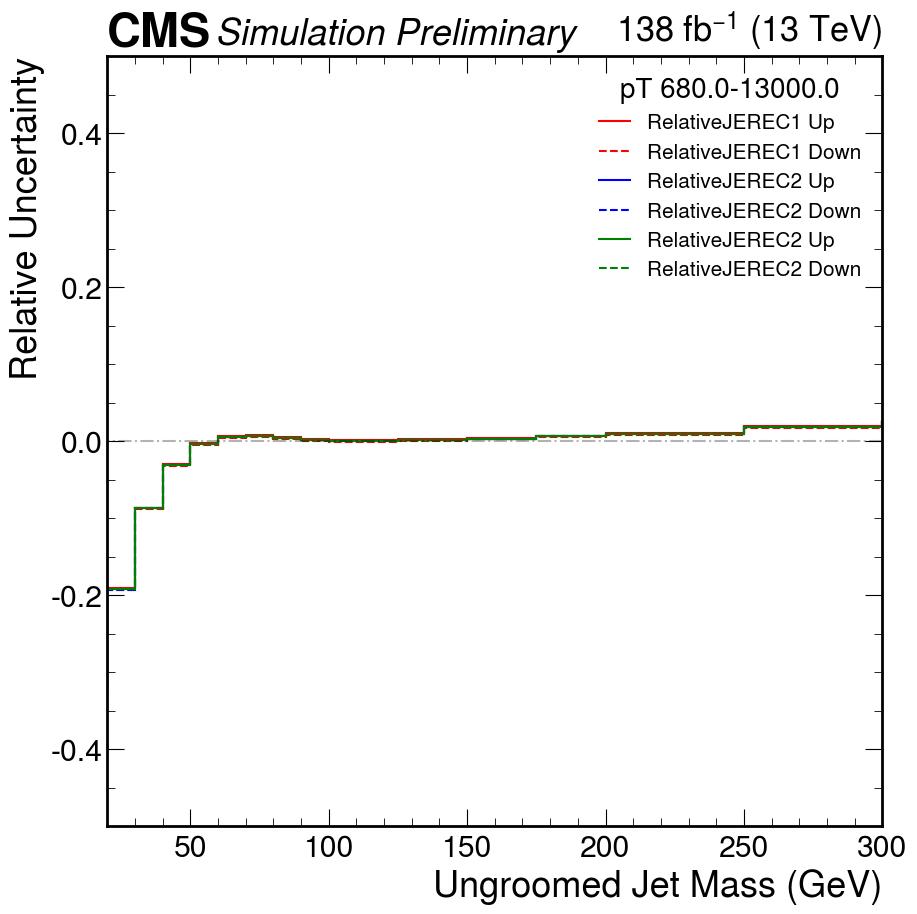

doing  RelativePtBB RelativePtEC1


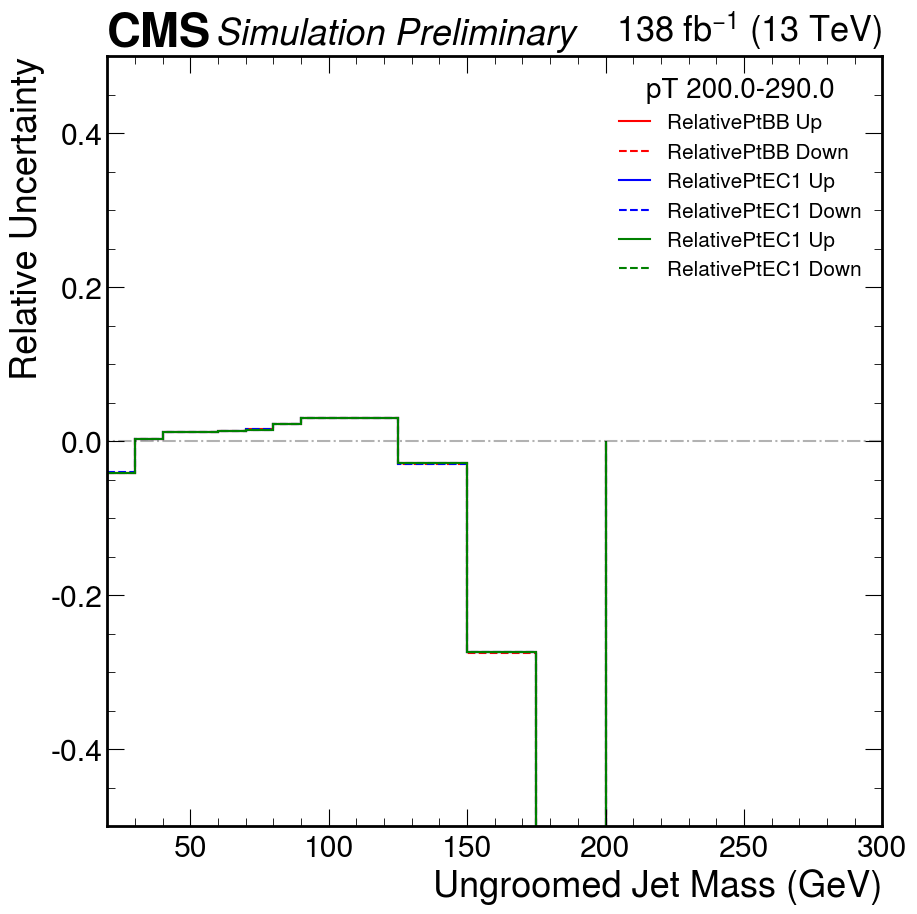

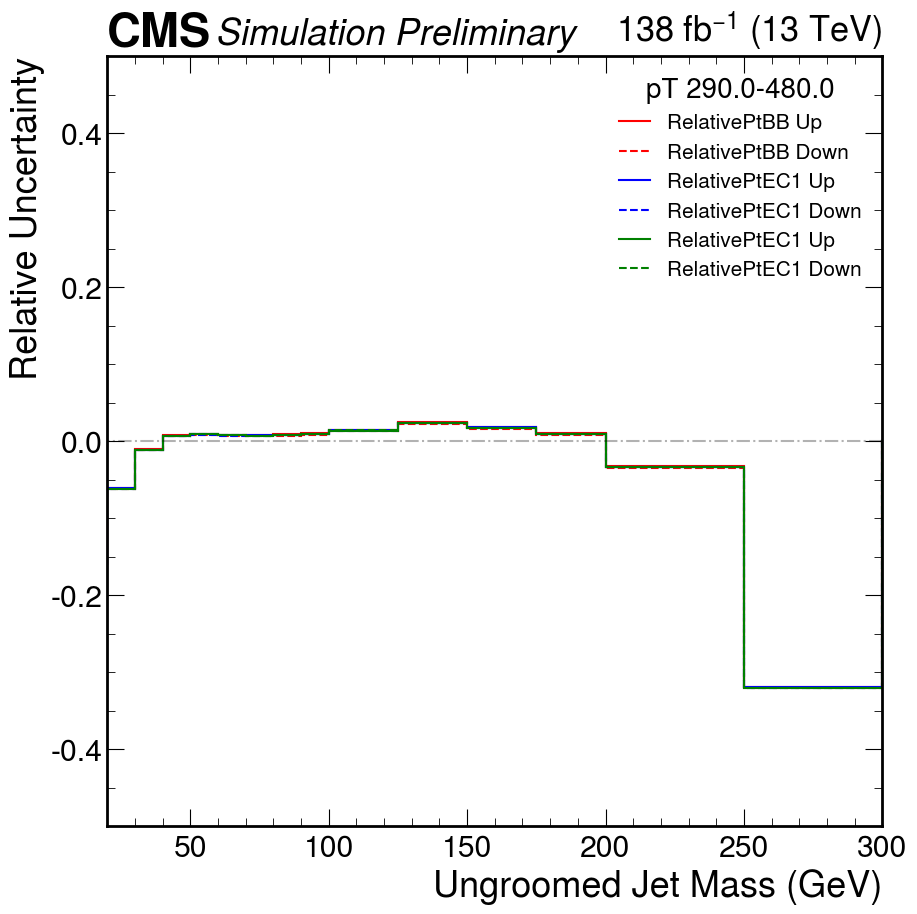

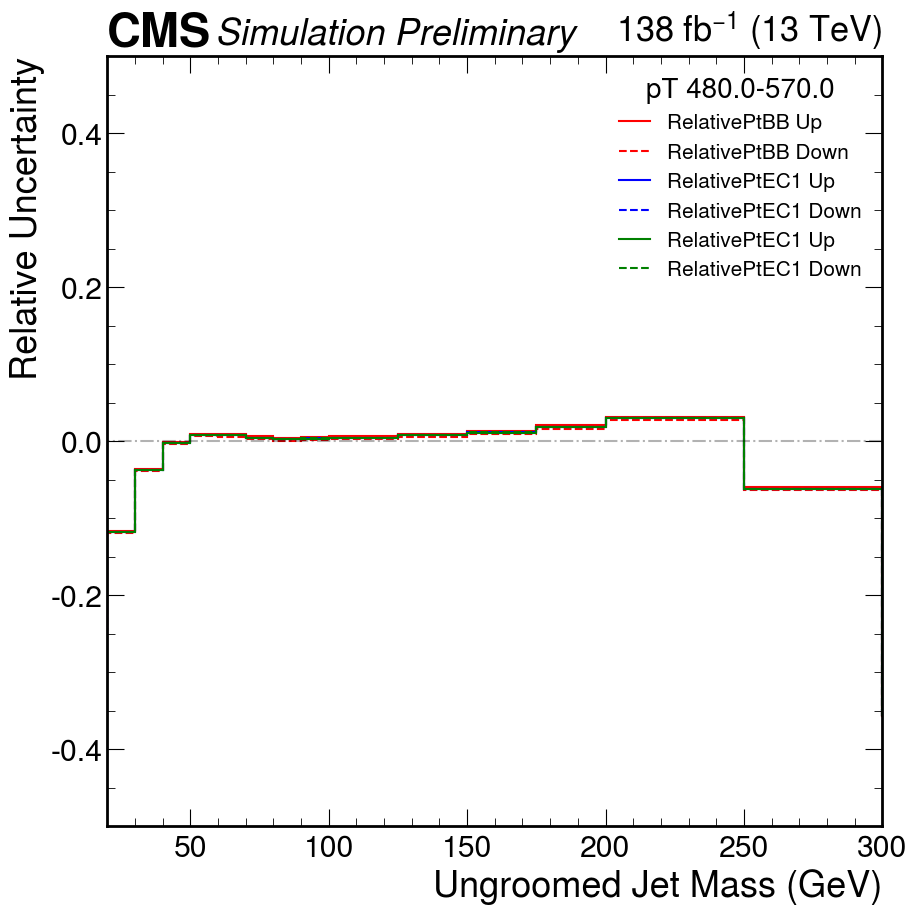

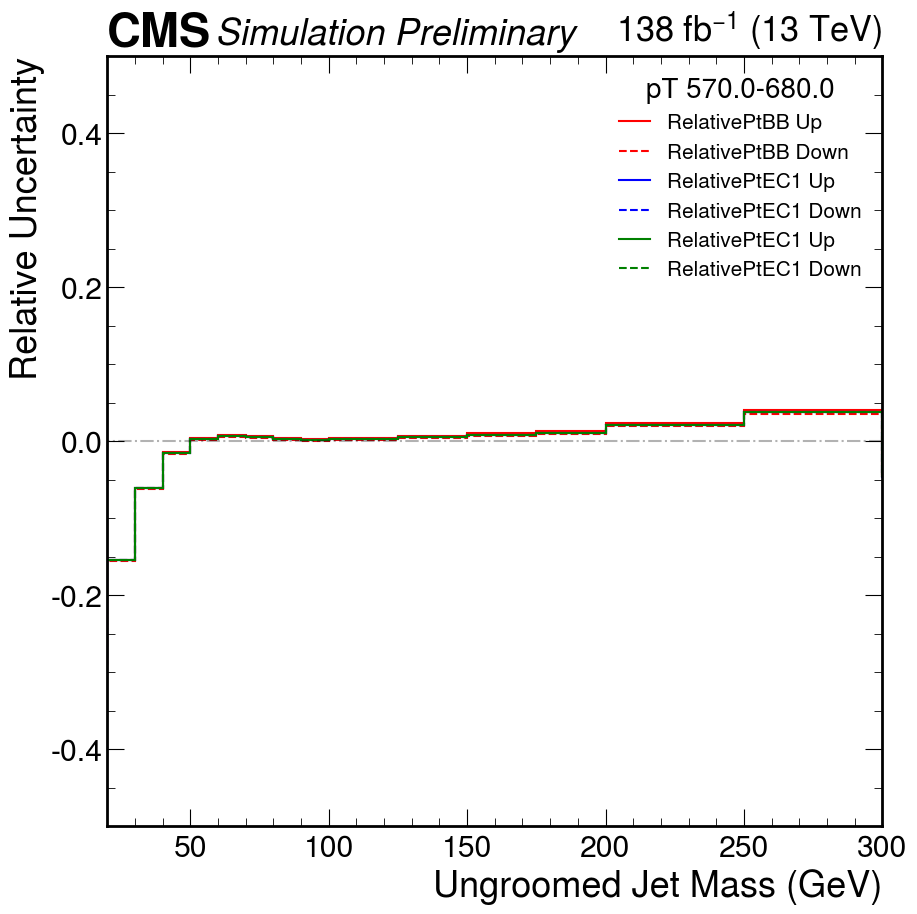

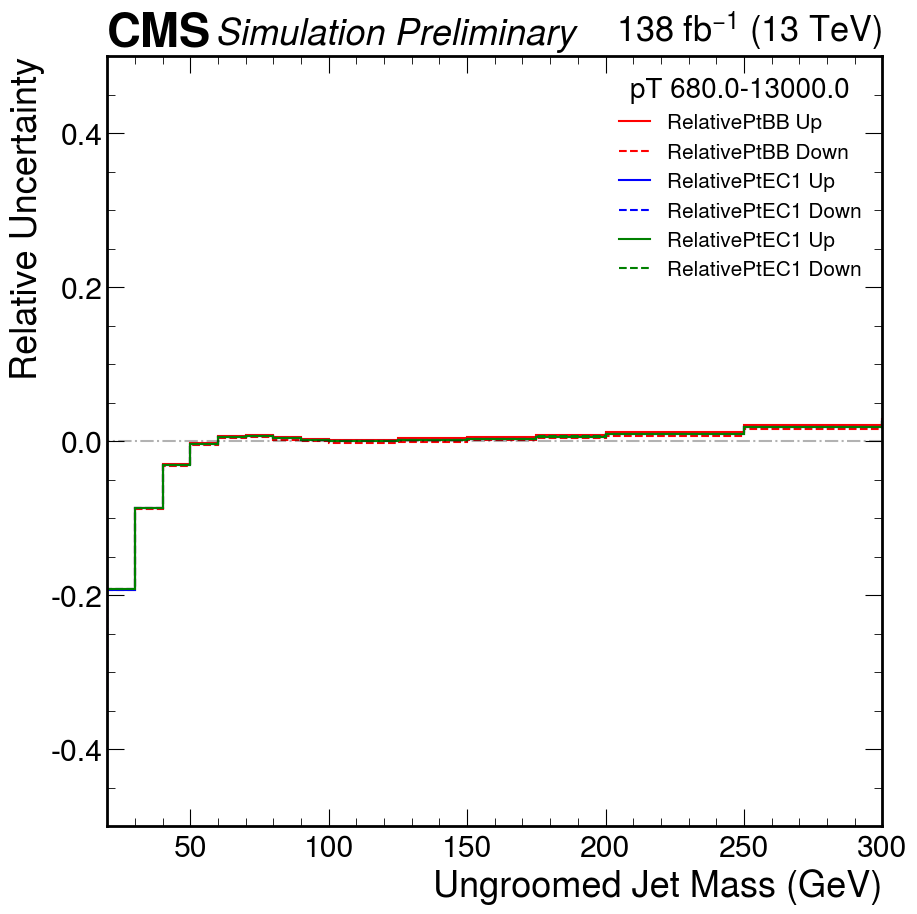

doing  RelativePtHF RelativeBal


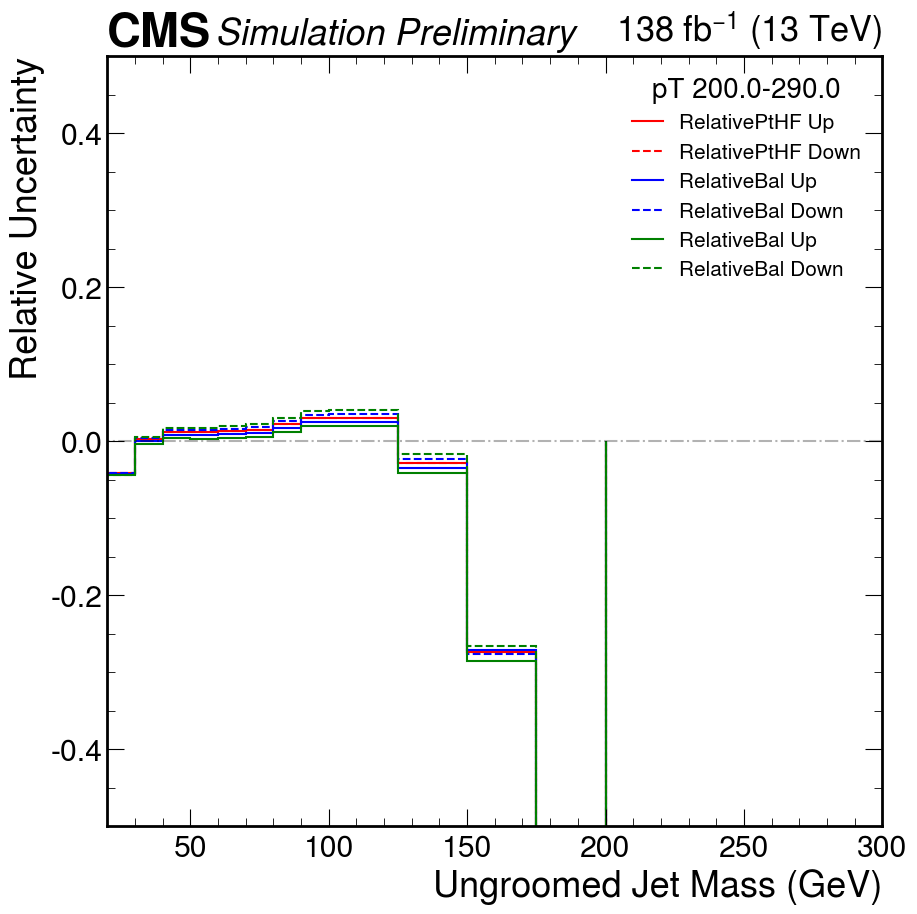

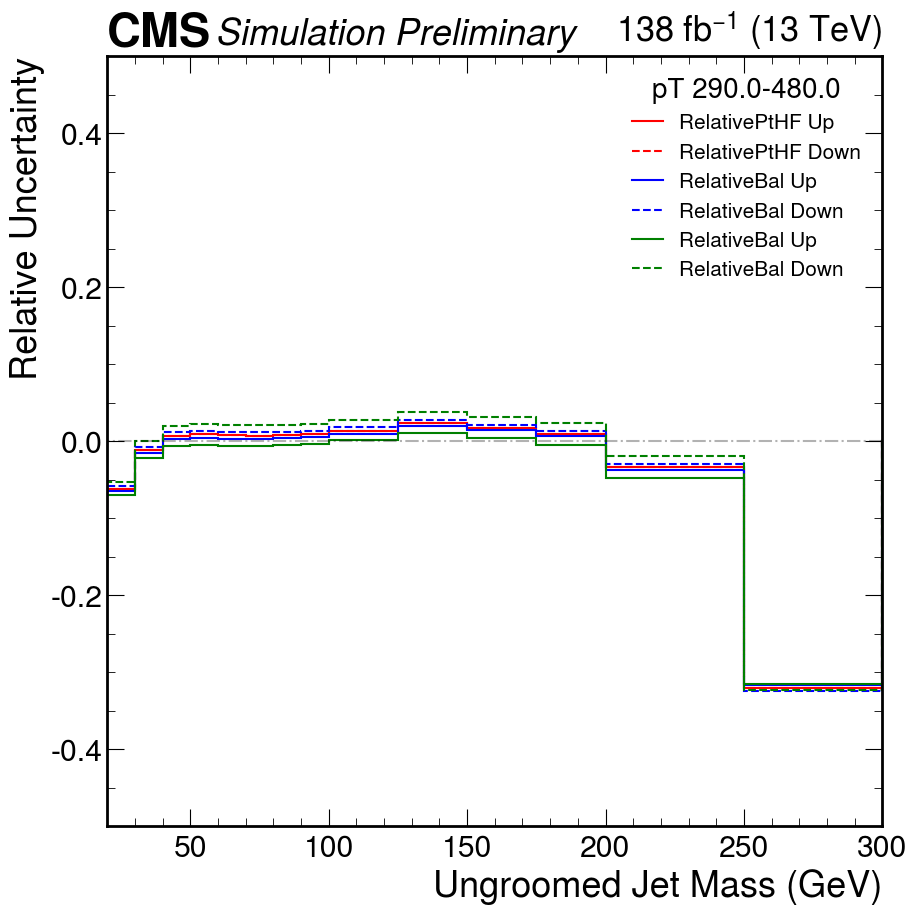

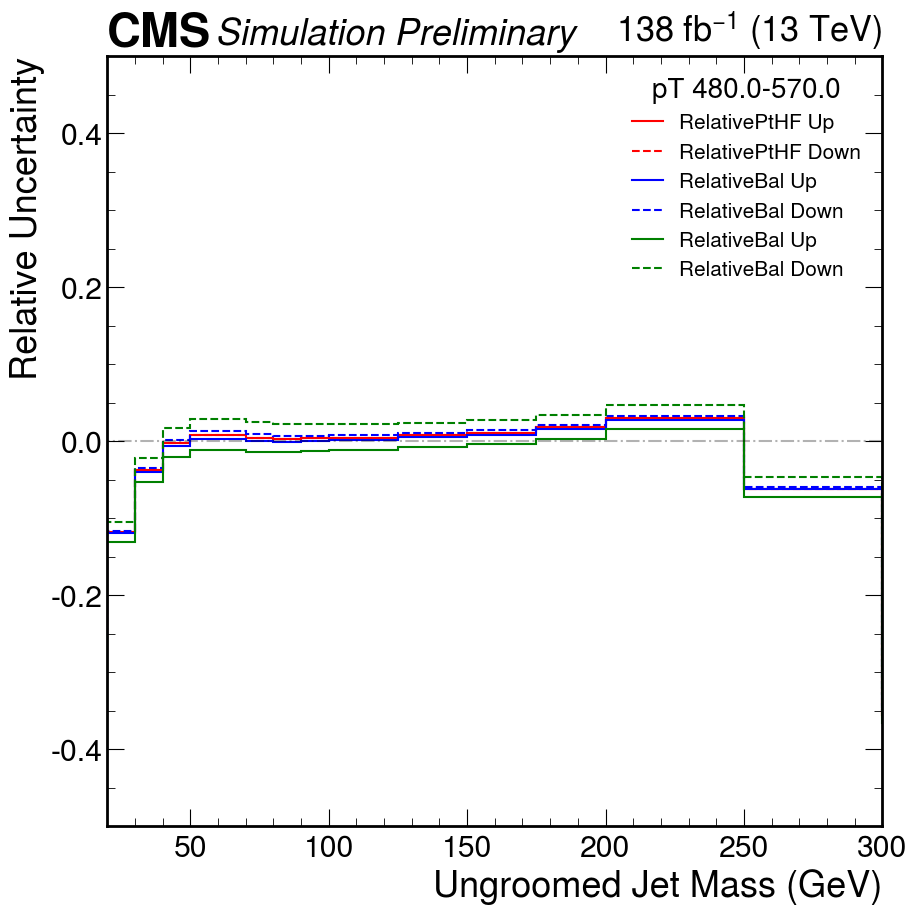

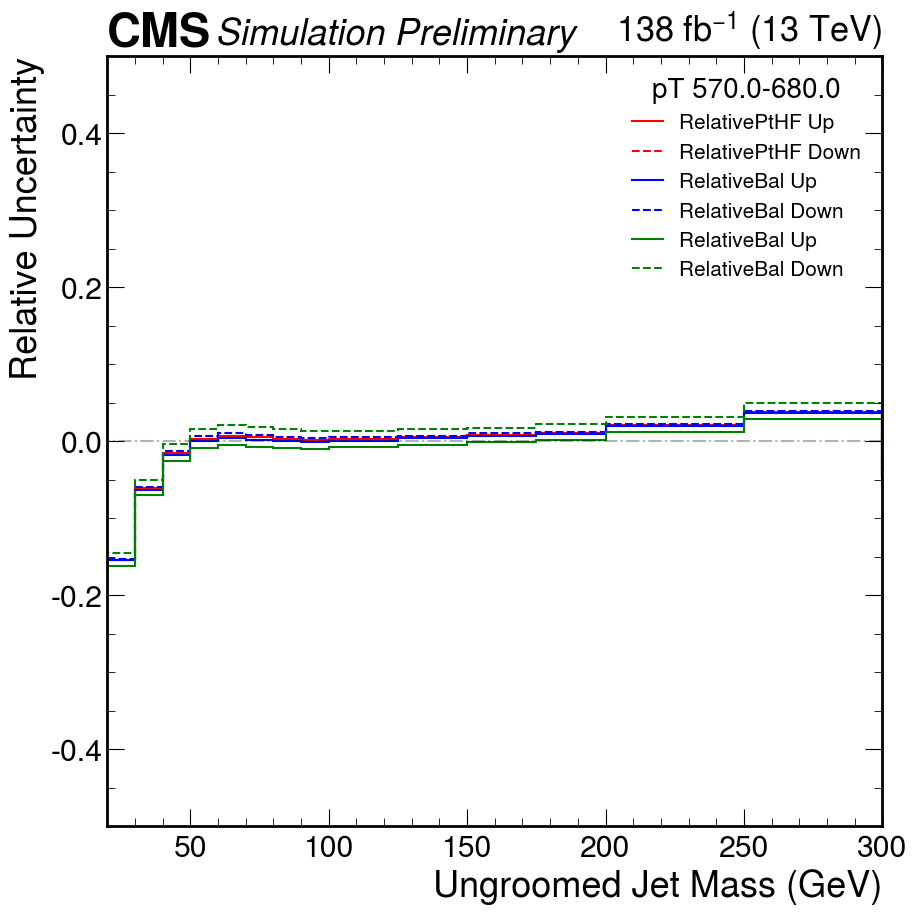

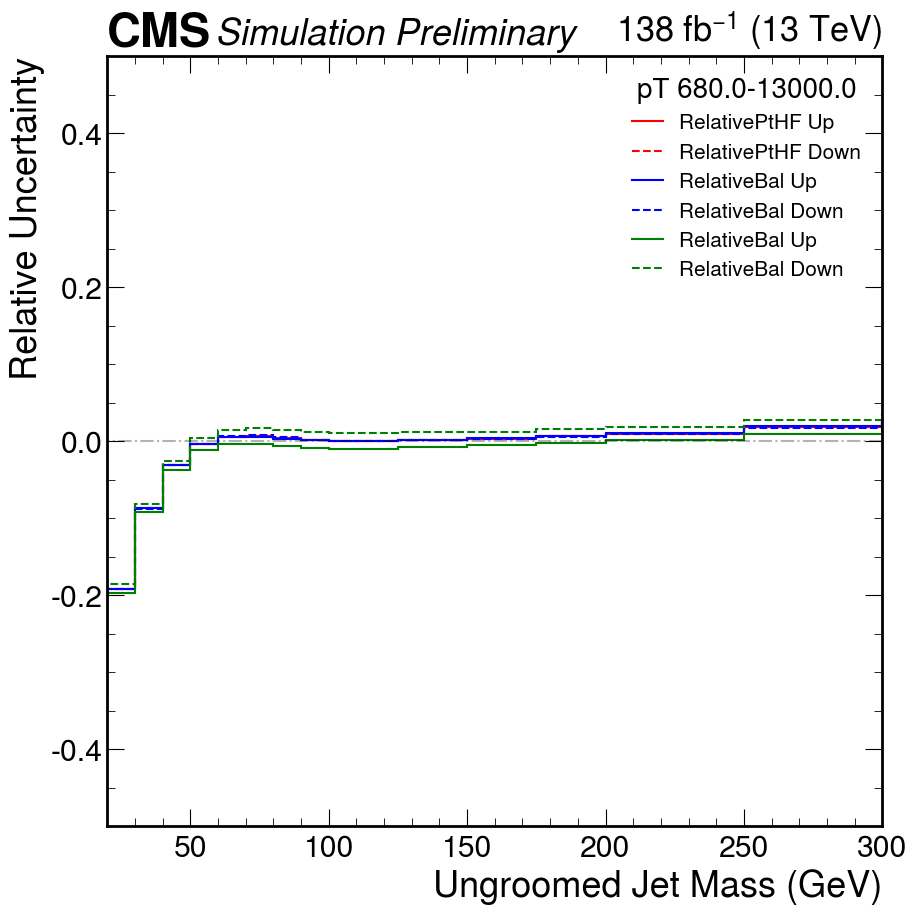

doing  RelativeStatEC RelativeStatFSR


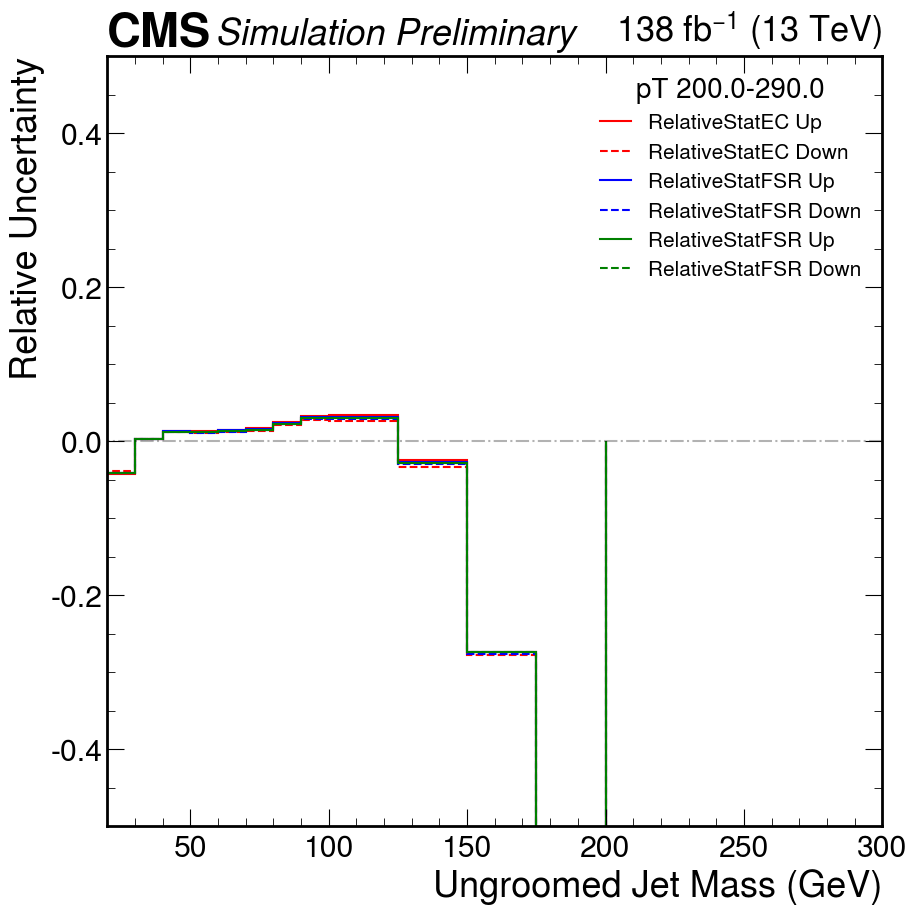

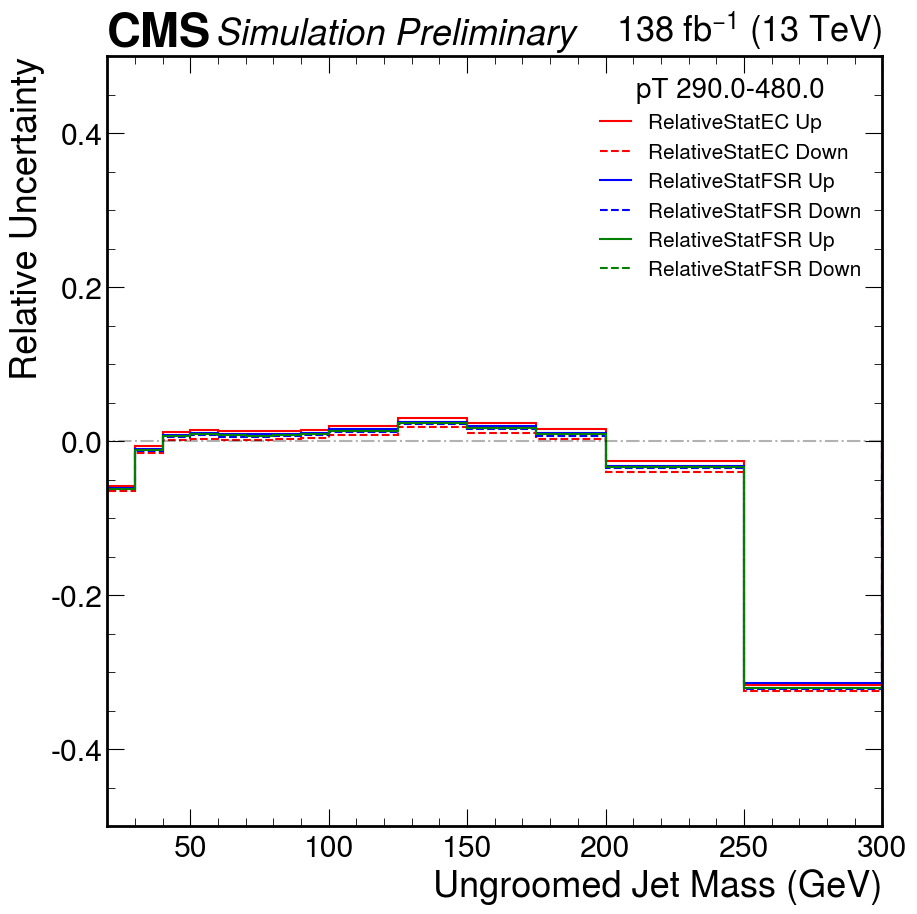

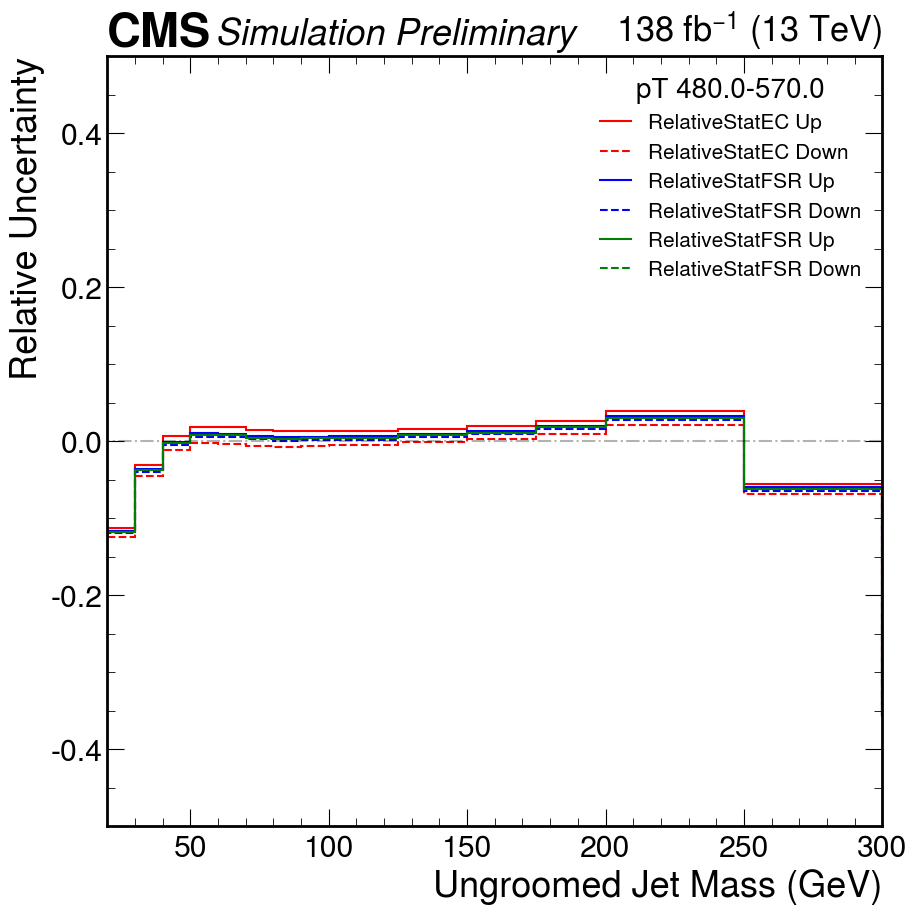

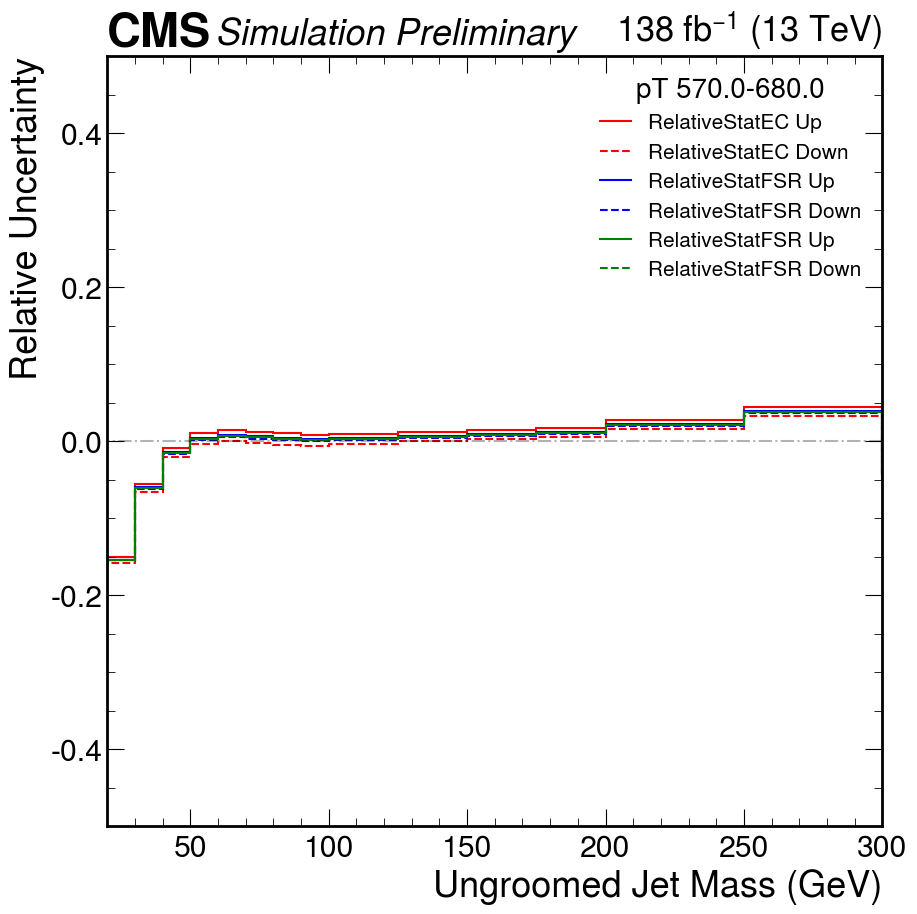

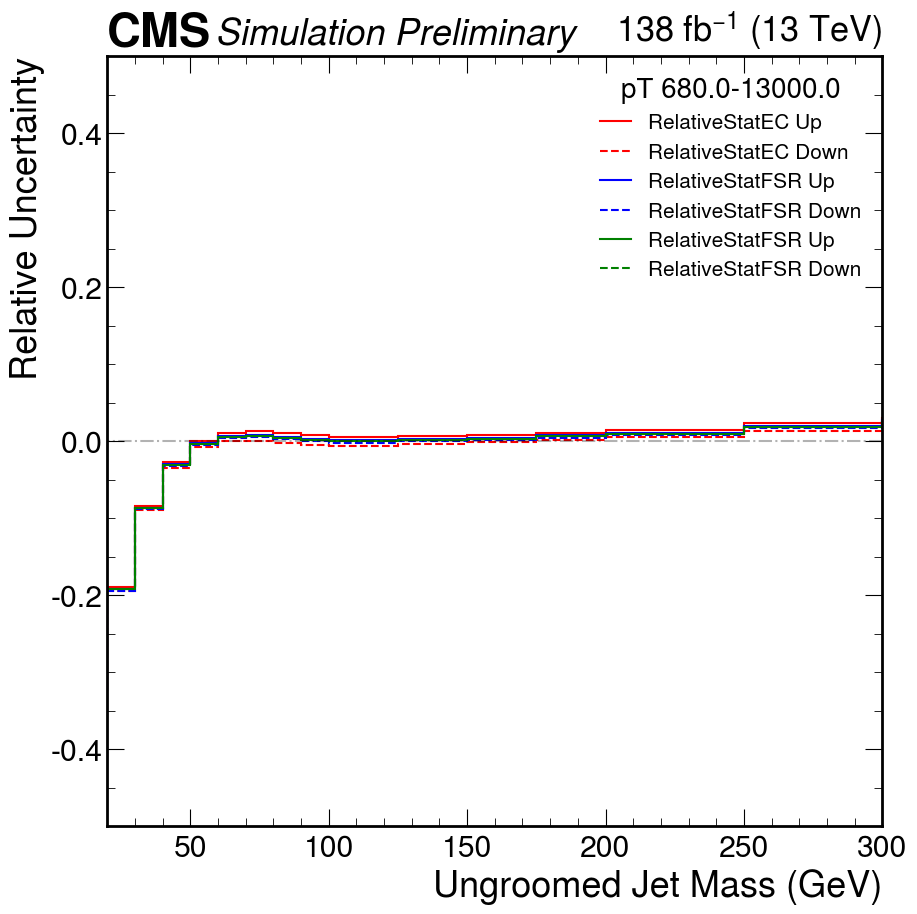

doing  SinglePionECAL SinglePionHCAL


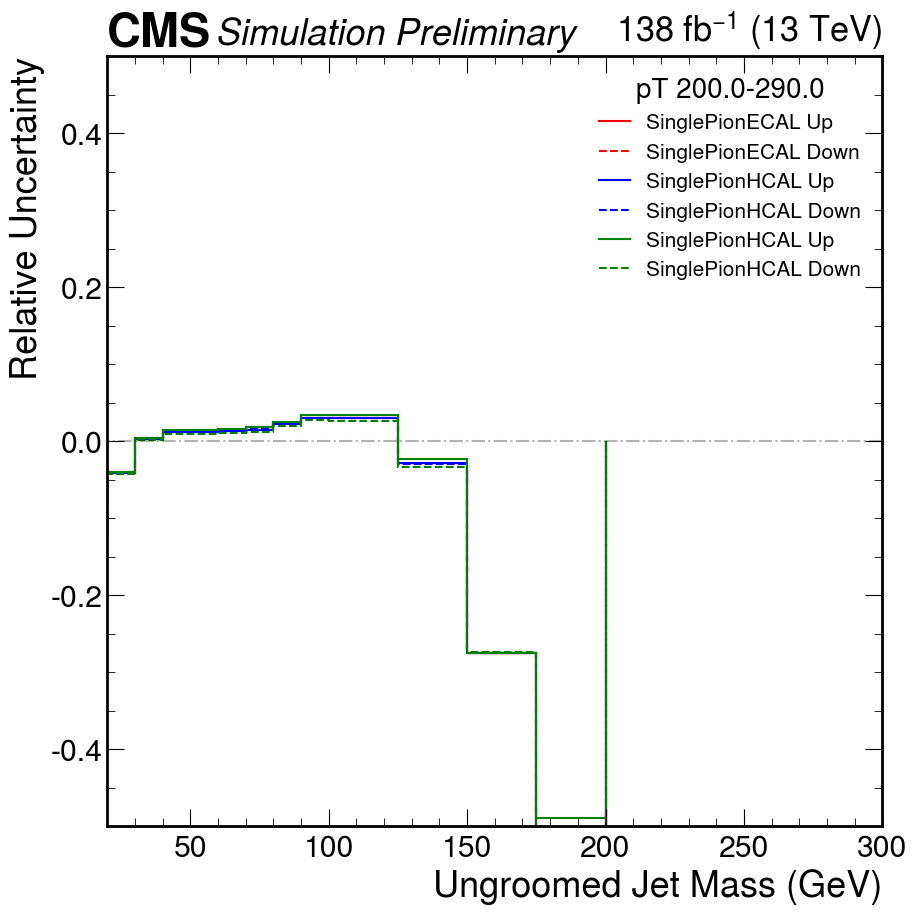

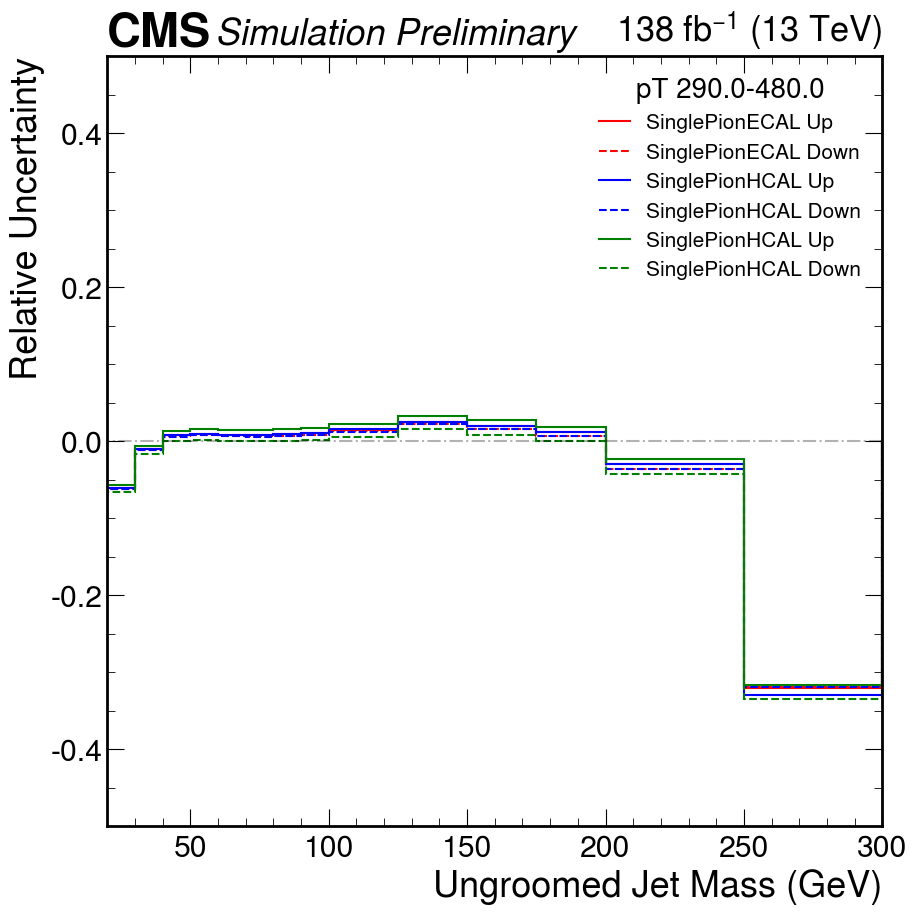

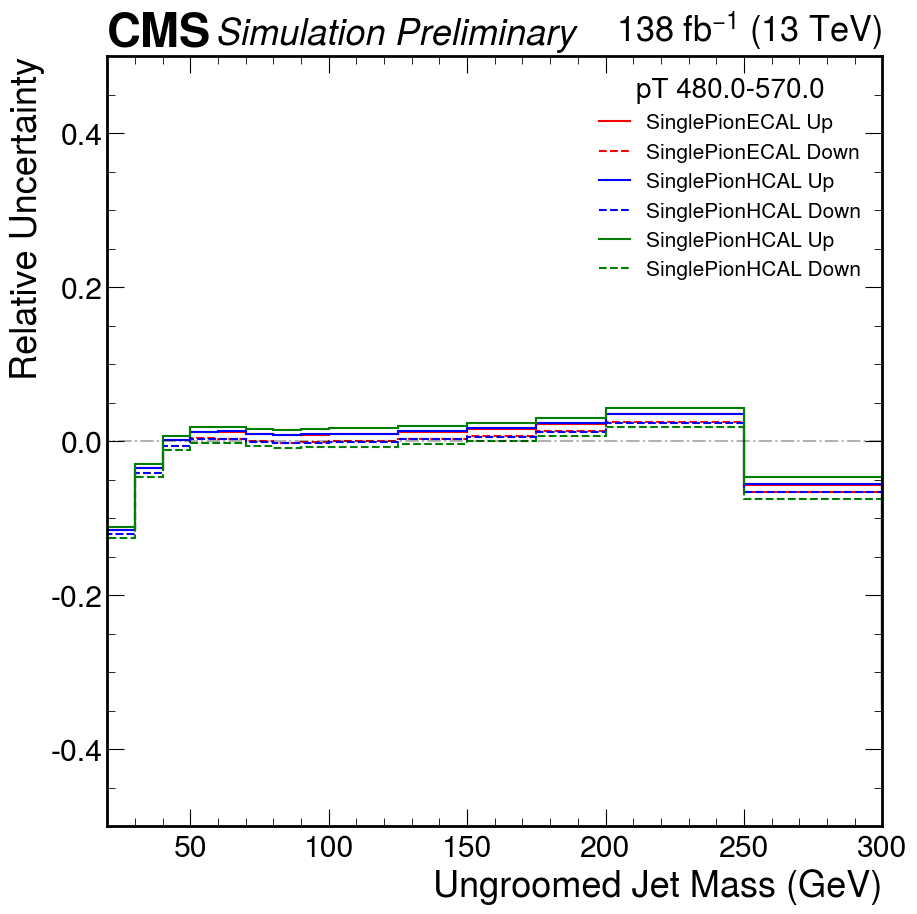

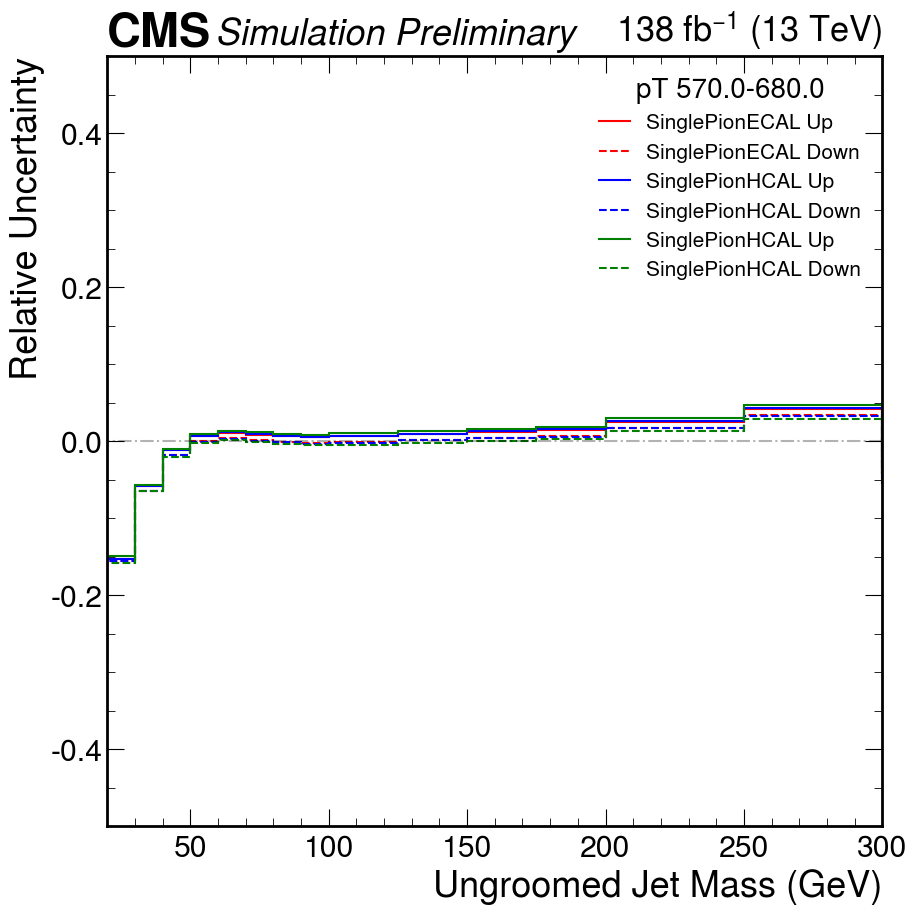

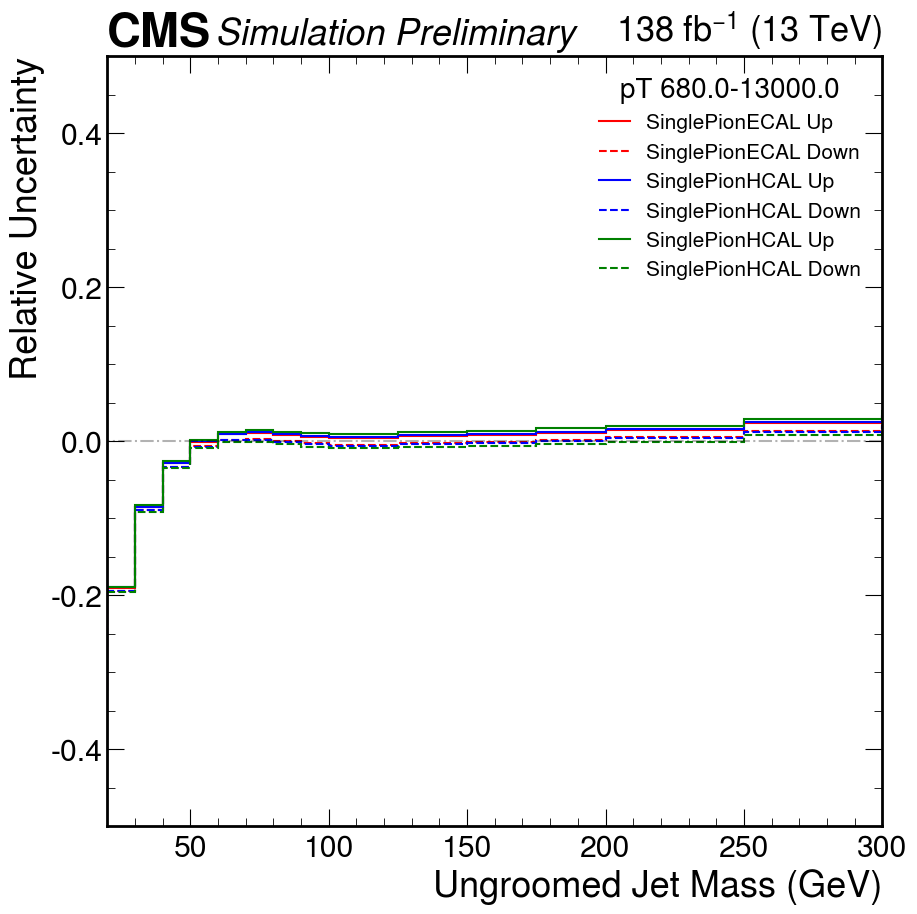

doing  Q2 PDF


KeyError: "'L1PreFiringWeightUp' not in axis"

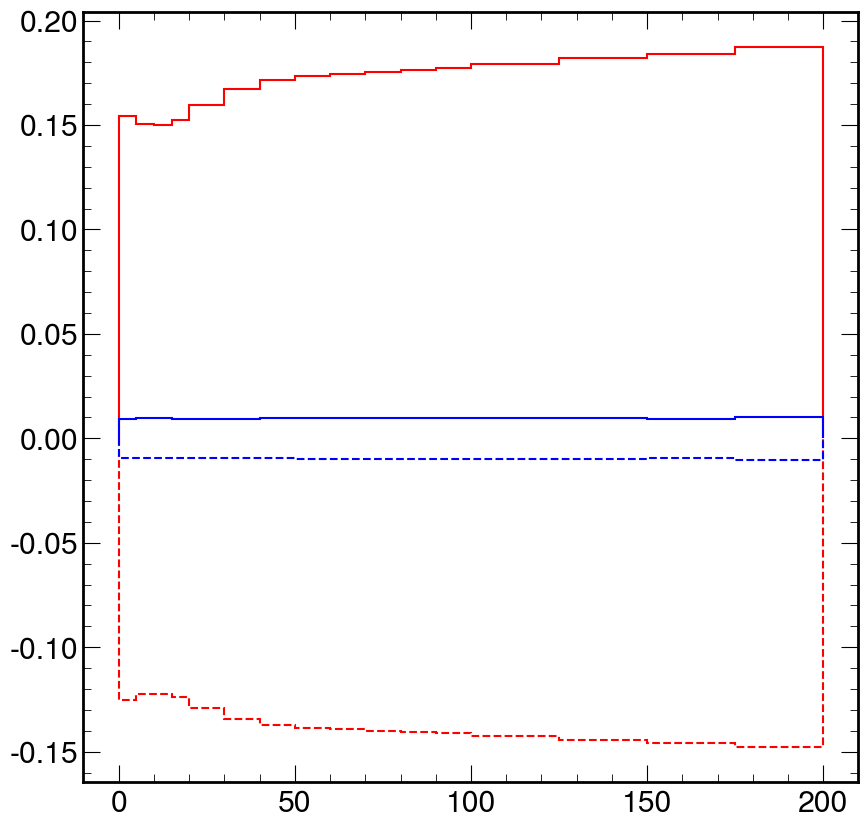

In [14]:
# print(unfolder.systematics['jerUp'])
systs = ["jer", "jmr", "jms", "AbsoluteMPFBias","AbsoluteScale","AbsoluteStat","FlavorQCD","Fragmentation","PileUpDataMC","PileUpPtBB","PileUpPtEC1",
"PileUpPtEC2","PileUpPtHF","PileUpPtRef","RelativeFSR","RelativeJEREC1",
            "RelativeJEREC2","RelativeJERHF","RelativePtBB","RelativePtEC1",
            "RelativePtEC2","RelativePtHF","RelativeBal","RelativeSample",
            "RelativeStatEC","RelativeStatFSR","RelativeStatHF","SinglePionECAL",
            "SinglePionHCAL","TimePtEta", "Q2", "PDF", 'L1PreFiringWeight', 'PUSF']
sys = systs
sys2 = 'Q2'
histname = "response_matrix_u"
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print(availSysts)
medges = [bin[0] for bin in result_mc["response_matrix_u"].project("mreco").axes[0]] + [result_mc["response_matrix_u"].project("mreco").axes[0][-1][1]]
ptedges = [bin[0] for bin in result_mc["response_matrix_u"].project("ptreco").axes[0]] + [result_mc["response_matrix_u"].project("ptreco").axes[0][-1][1]]
npt = len(ptedges)-1
for i in range(0, len(systs)-1, 3):
    sys = systs[i]
    sys2 = systs[i+1]
    sys3 = systs[i+2]
    print("doing ", sys, sys2)
    for ipt in range(npt):
        # print(sys, plotFractionalUnc(result_mc, histname, sys_list = [sys+'Up']))
        hep.histplot(plotFractionalUnc(result_mc, histname, sys_list = [sys+'Up'])[ipt][0],plotFractionalUnc(result_mc, histname, sys_list = [sys+'Up'])[ipt][1], label = sys+' Up' , color = 'r' )
        hep.histplot(plotFractionalUnc(result_mc, histname, sys_list = [sys+'Down'])[ipt][0], plotFractionalUnc(result_mc, histname, sys_list = [sys+'Down'])[ipt][1], label = sys+' Down'  , ls = '--', color = 'r')
    
        hep.histplot(plotFractionalUnc(result_mc, histname, sys_list = [sys2+'Up'])[ipt][0],plotFractionalUnc(result_mc, histname, sys_list = [sys2+'Up'])[ipt][1], label = sys2+' Up' , color ='b' )
        hep.histplot(plotFractionalUnc(result_mc, histname, sys_list = [sys2+'Down'])[ipt][0], plotFractionalUnc(result_mc, histname, sys_list = [sys2+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='b')
    
        hep.histplot(plotFractionalUnc(result_mc, histname, sys_list = [sys3+'Up'])[ipt][0],plotFractionalUnc(result_mc, histname, sys_list = [sys3+'Up'])[ipt][1], label = sys2+' Up' , color ='g' )
        hep.histplot(plotFractionalUnc(result_mc, histname, sys_list = [sys3+'Down'])[ipt][0], plotFractionalUnc(result_mc, histname, sys_list = [sys3+'Down'])[ipt][1], label = sys2+' Down'  , ls = '--', color ='g')
    
        
        plt.hlines(0, 0, 300, color = 'k' , ls = '-.', alpha = 0.3)
        plt.legend(title = "pT "+str(ptedges[ipt])+"-"+str(ptedges[ipt+1]), fontsize = 15, title_fontsize = 20)
        if groomed:
            plt.xlabel("Groomed Jet Mass (GeV)")
            plt.xlim(10,300)
        else:
            plt.xlabel("Ungroomed Jet Mass (GeV)")
            plt.xlim(20,300)
        plt.ylabel("Relative Uncertainty")
        #plt.yscale('symlog')
        plt.ylim(-.5, .5)
        # plt.yscale('symlog')
        hep.cms.label('Preliminary', rlabel = r"138 $fb^{-1}$ (13 TeV)")
            
        
        plt.show()

In [ ]:
plotDataMCwErrors(result_mc, result_data, "response_matrix_u", 'ptreco_mreco_u', "mreco", IOV="ALL", channel = "", rax_lim=[0.0,5], norm=True)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV="ALL", channel = "trijet", rax_lim=[0.5,4], norm=True)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV="ALL", channel = "trijet", rax_lim=[0.5,2], norm=True)

In [ ]:
from python.plotting import plotSyst
#plotSyst(result_mc, "response_matrix_u", 'ptreco', label = r'2018 (13 TeV)', IOV='2018', channel='trijet', os_path=os_path)

In [ ]:
# plotSyst(result_mc, "response_matrix_u", 'mreco', label = r'2018 (13 TeV)', IOV='2018', channel='trijet')

In [ ]:
# #### Plot dijet systematics
# fname = "coffeaOutput/dijet/dijetHists_JetHT_pt200.0_rapidity2.5_2018.pkl"
# fname = "coffeaOutput/dijet/dijetHists_JetHT_newMandPtBins_rapidity2.5_nominal2018.pkl"
# with open(fname, "rb") as f:
#     result_data = pickle.load( f )
# #fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUncRespOnlyNEW2018.pkl"
# # fname="coffeaOutput/dijet/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUnc2018RespOnly.pkl"
# fname = "coffeaOutput/dijet/dijetHists_wXSscaling_QCDsim_newMandPtBins_rapidity2.5_nominal2018.pkl"
# with open(fname, "rb") as f:
#     result_mc = pickle.load( f )

# year = fname[-8:-4]
# # fname = "coffeaOutput/trijetHists_JetHT_pt200-Copy1.0_rappidity2.5_NoneHEMveto2018.pkl"
# # with open(fname, "rb") as f:
# #     result_mc_older = pickle.load( f )
# if "trijet" in fname:
#     os_path = 'plots/syst/trijet/'
# else: os_path = 'plots/syst/dijet/'
# # print(result_mc['cutflow'])
# checkdir(os_path)

In [ ]:
plotDataMCwErrorsBinned(result_mc, result_mc, "response_matrix_u", 'ptreco_mreco_u', "mreco", channel = "", rax_lim=[0,2], binwnorm=False)

In [ ]:

plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=2018, channel = "dijet", rax_lim=[0,2])
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=2018, channel = "dijet")
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "ptreco", IOV=2018, channel = "dijet", norm=True)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=2018, channel = "dijet", norm=True, rax_lim=[0,2])
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=2018, channel = "dijet", norm=True, rax_lim=[0,2])


In [ ]:

#plotSyst(result_mc, "response_matrix_u", 'ptreco', label = r'2018 (13 TeV)', IOV='2018', channel='dijet')


In [ ]:

plotSyst(result_mc, "response_matrix_u", 'mreco', label = r'2018 (13 TeV)', IOV='2018', channel='dijet')


In [ ]:
#### Plot dijet systematics

histname="ptreco_mreco_u"
availAxes = [ax.name for ax in result_hem[histname].axes]
availSysts = [ax for ax in result_hem[histname].project("syst").axes[0]]
print([ax for ax in result_hem[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)

def compareDatasets(result, histname, axVar, syst=None):
    if syst==None:
        syst = "nominal"
    edges = [bin[0] for bin in result[0][histname].project(axVar).axes[0]] + [result[0][histname].project(axVar).axes[0][-1][1]]
    fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
    ratio = np.divide(result[0][histname][{'syst':syst}].project(axVar).values(),result[1][histname][{"syst":"nominal"}].project(axVar).values(),
                                    out=np.empty(np.array(result[1][histname][{"syst":syst}].project(axVar).values()).shape).fill(np.nan),
                                    where=result[1][histname][{"syst":syst}].project(axVar).values()!= 0,)
    hep.histplot(ratio, edges, stack=True, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
    hep.histplot(result[0][histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, ax=ax, density=False, linestyle ='-', color = 'red', linewidth=1,label="hemVeto")
    hep.histplot(result[1][histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, ax=ax, density=False, linestyle ='-', linewidth=1,label=syst)
    #### Fill ratio plot
    ax.set_xlabel(None)
    ax.autoscale(axis='x', tight=True)
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)
    hep.histplot(np.ones_like(ratio), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'black', linewidth=1)
    rax.set_ylabel(r'$\frac{HEMveto}{Nominal}$', loc = 'center')
    rax.set_ylim(0.9,1.1)
compareDatasets([result_hem, result], 'ptreco_mreco_u', 'mreco')
compareDatasets([result_hem, result], 'ptreco_mreco_u', 'ptreco')

In [ ]:
data = [result[histname][{'syst':"nominal"}].project('mreco'), 
                  result[histname][{'syst':"nominal"}].project('mreco'),
         result[histname][{'syst':"nominal"}].project('ptreco'), 
                  result[histname][{'syst':"nominal"}].project('ptreco')]
hemdata = [result_hem[histname][{'syst':"nominal"}].project('mreco'), 
              result_hem[histname][{'syst':"nominal"}].project('mreco'),
     result_hem[histname][{'syst':"nominal"}].project('ptreco'), 
              result_hem[histname][{'syst':"nominal"}].project('ptreco')]
for i, mchist in enumerate(data):
    fig, ax, = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,7))
    # ax.autoscale(axis='x', tight=True)
    # grid = fig.add_gridspec(4,1, figure=fig, wspace=0, hspace=0)
    num = hemdata[i]
    denom = data[i]
    # main_ax = fig.add_subplot(grid[:-1, :])
    # plt.setp(main_ax.get_xticklabels(), visible=False)
    # main_ax.set_yscale("log")
    # main_ax.set_xlim([0,2200])
    # subplot_ax = fig.add_subplot(grid[-1, :], sharex=main_ax)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                          rp_num_label='hem',
                                          rp_denom_label="nominal",
                                          rp_uncert_draw_type="line",)
                                          # ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax})
    plt.ylabel("HEM/Nominal")
    plt.savefig(os_path+"/compareDataHEM_test.png")